# Global Power Plant Database
## Problem Statement:
### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
 

### Fuel Type Aggregation:
We define the "Fuel Type" attribute of our database based on common fuel categories. 

## Prediction :   Make two prediction
* **1) Primary Fuel.**
* **2) capacity_mw.**



* **Find the dataset link below.**

* Downlaod Files:
https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv

In [1]:
# Importing Necessery liabraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)

In [2]:
#  Importing dataset
df = pd.read_csv(r"D:\data scienctist\projects\Evolution Projects\Evolution projects data\database_IND.csv")
df.head()# Printing first five rows of  the dataset

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
df.shape

(907, 27)

*  So here we can see The dataset contains the details of Global Power Plant. this dataset is comprised of 907 rows and 25 columns including 2 target varibales 'capacity_mw' and 'primary_fuel' where we need to predict both 'capacity_mw' and 'primary_fuel'(Fuel Type). 
*  When we take a look at the values present in the column 'primary_fuel' we see that there are categorical data in that column so when we consider it as our label it will be termed as a **Classification problem**! 
*  Similarly, if we take a look at the values present in the column 'capacity_mw' we see that there are continous data in that column so when we consider it as our label it will be termed as a **Regression problem**! 
*  So, We will choose to perform the analysis on our entire data set first then will process the information accordingly to bifurcate the inputs for a Classification model and a Regression model.

# EDA (Exploratory Data Analysis)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

### Key attributes of the database


The database includes the following indicators:


* **country** (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
* **country_long** (text): longer form of the country designation
* **name** (text): name or title of the power plant, generally in Romanized form
* **gppd_idnr** (text): 10 or 12 character identifier for the power plant
* **capacity_mw** (number): electrical generating capacity in megawatts
* **latitude** (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
* **longitude** (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
* **primary_fuel** (text): energy source used in primary electricity generation or export
* **other_fuel1** (text): energy source used in electricity generation or export
* **other_fuel2** (text): energy source used in electricity generation or export
* **other_fuel3** (text): energy source used in electricity generation or export
* **commissioning_year** (number): year of plant operation, weighted by unit-capacity when data is available
* **owner** (text): majority shareholder of the power plant, generally in Romanized form
* **source** (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
* **url** (text): web document corresponding to the **source** field
* **geolocation_source** (text): attribution for geolocation information
* **wepp_id** (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
* **year_of_capacity_data** (number): year the capacity information was reported
* **generation_gwh_2013** (number): electricity generation in gigawatt-hours reported for the year 2013
* **generation_gwh_2014** (number): electricity generation in gigawatt-hours reported for the year 2014
* **generation_gwh_2015** (number): electricity generation in gigawatt-hours reported for the year 2015
* **generation_gwh_2016** (number): electricity generation in gigawatt-hours reported for the year 2016
* **generation_gwh_2017** (number): electricity generation in gigawatt-hours reported for the year 2017
* **generation_gwh_2018** (number): electricity generation in gigawatt-hours reported for the year 2018
* **generation_gwh_2019** (number): electricity generation in gigawatt-hours reported for the year 2019
* **generation_data_source** (text): attribution for the reported generation information
* **estimated_generation_gwh_2013** (number): estimated electricity generation in gigawatt-hours for the year 2013
* **estimated_generation_gwh_2014** (number): estimated electricity generation in gigawatt-hours for the year 2014 
* **estimated_generation_gwh_2015** (number): estimated electricity generation in gigawatt-hours for the year 2015 
* **estimated_generation_gwh_2016** (number): estimated electricity generation in gigawatt-hours for the year 2016 
* **estimated_generation_gwh_2017** (number): estimated electricity generation in gigawatt-hours for the year 2017 
* **estimated_generation_note_2013** (text): label of the model/method used to estimate generation for the year 2013
* **estimated_generation_note_2014** (text): label of the model/method used to estimate generation for the year 2014 
* **estimated_generation_note_2015** (text): label of the model/method used to estimate generation for the year 2015
* **estimated_generation_note_2016** (text): label of the model/method used to estimate generation for the year 2016
* **estimated_generation_note_2017** (text): label of the model/method used to estimate generation for the year 2017

In [5]:
# checking number of unique values in each column
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

* from the above cell we can check the no. of unique values present in each columns:

    Here the columns 'country', 'country_long', 'other_fuel2', 'year_of_capacity_data' and 'generation_data-source' have only 1 unique value. Aslo 'other_fuel3', 'wepp_id', 'estimated_generation_gwh' have no unique values which means they are filled with only NAN values. Since these columns have same entries thoughout the dataset so we can drop these columns.

In [6]:
# Checkig for null values

df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

* So here we can see there are huge missing values present in most of the columns. We will fill them using imputation techniques after checking skewness in these columns.

In [7]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [8]:
df['country'].nunique()

1

In [9]:
df['country_long'].nunique()

1

In [10]:
df['commissioning_year'].nunique()

73

In [11]:
df['source'].nunique()

191

In [12]:
df.head(3)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

**We are dropping following columns from our dataset -**

* **country** - As we have all data for India.
* **country_long** - As country is same columns with short names.
* **name** - Name of a power plant is irrelevant for prediction.
* **gppd_idnr** - This is again some specific id given to plant , irrelevant for prediction.
* **other_fuel1 / other_fuel2 / other_fuel3** - More than 90 % of missing values (Nans).
* **url** - Irrelavant for prediction.
* **wepp_id** - This column is again a unique id for a power plant.
* **generation_data-source**- It only 1 unique value, so it becomes irrelavant for prediction.
* **estimated_generation_gwh / generation_gwh_2019 / generation_gwh_2013** - It is filled with only NAN values
* **year_of_capacity_data** - More than 60 % of null values.

In [14]:
# Dropping columns
df.drop(['country','country_long', 'name', 'gppd_idnr', 'other_fuel1', 'other_fuel2', 'other_fuel3','url', 'wepp_id'],axis = 1 , inplace = True)
df.drop(['estimated_generation_gwh','owner','year_of_capacity_data','generation_gwh_2013','generation_gwh_2019','generation_data_source'], axis = 1 , inplace = True)

In [15]:
df.shape

(907, 12)

In [16]:
# checking null values
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

* So here we can see there are huge missing values present in most of the columns. We will fill them using imputation techniques after checking skewness in these columns.

<AxesSubplot:>

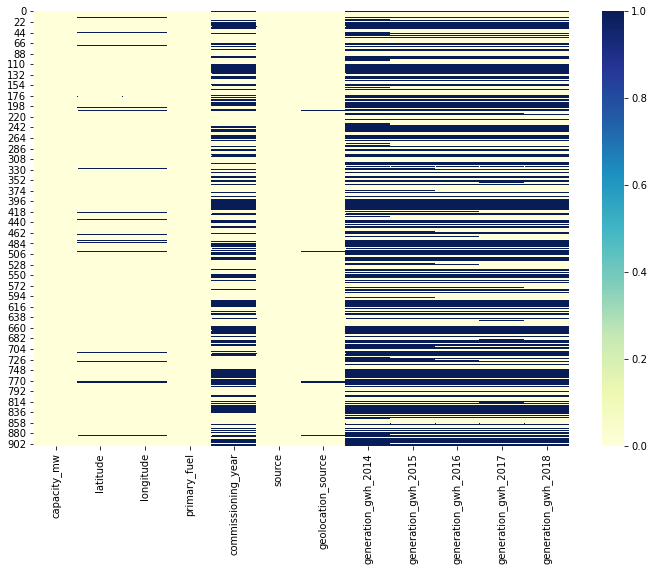

In [17]:
# Let's visualize the null values clearly
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull(),cmap="YlGnBu")

* So here we can easily see the white lines in the heatmap which indicates the missing values in the dataset.

In [18]:
df.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

### Filling null values:
* Treating null values using imputation technique.
* Most of the columns have missing values except the target variables and the feature source.

* The columns latitude has numerical data and has no skewness and outliers so we can use mean method to fill the outliers.

In [19]:
# let's check the mean of the latitude
df['latitude'].mean()       # we can replace the null values using this mean

21.19791811846691

In [20]:
# filling missing values in latitude using mean
df['latitude']=df['latitude'].fillna(df['latitude'].mean())

* The 'geolocation_source' has categorical data so we can fill the null values using mode method.

In [21]:
# let's check the mode of geolocation_source column
df['geolocation_source'].mode()       # we can fill the null values using this mode

0    WRI
dtype: object

In [22]:
# filling null values by its mode WRI
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

* The columns longitude commissioning year, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh-2016, generation_gwh_2017 and generation_gwh_2018 are numerical type and have huge outliers and skewness so will replace missing values using median method

In [23]:
# filling null values using their median values
df['longitude']=df['longitude'].fillna(df['longitude'].median())
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].median())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median())

In [24]:
# let's check the null values if there any
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

* Now we have removed all the null values using imputation method and the data is now clean. So we can move further.

<AxesSubplot:>

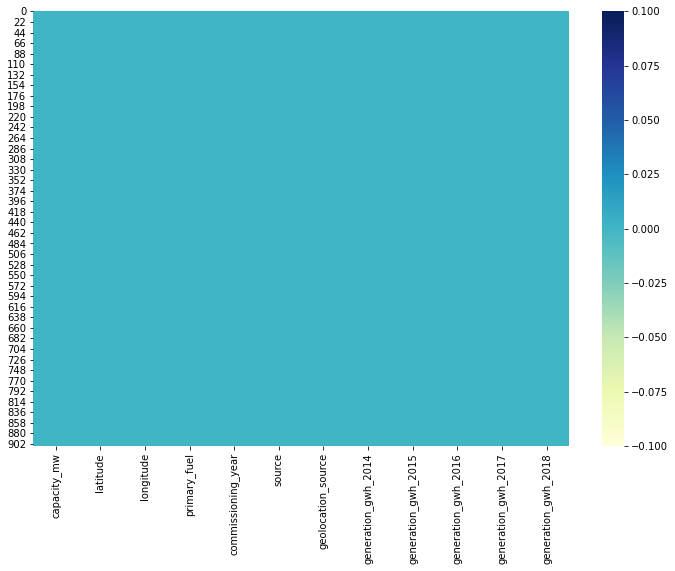

In [25]:
# let's visualize the null values clearly
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull(),cmap="YlGnBu")

* So it is clear that there are no missing values present in the dataset.

In [26]:
# checking how many columns are there in the dataset
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [27]:
# checking the list of counts of capacity_mw
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
31.2       1
105.7      1
63.2       1
49.6       1
2.5        1
Name: capacity_mw, Length: 361, dtype: int64

* There are unique counts present in capacity_mw columns.

In [28]:
# ckecking the list of counts of primary_fuel
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

* There are th list of the values in the column primary_fuel.

In [29]:
# checking the uniqueness of primary_fuel
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

* There are the unique classes present in the primary_fuel columns.

In [30]:
# checking the list of counts of commissioning_year
df['commissioning_year'].value_counts()

2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1939.0      1
1927.0      1
1949.0      1
1956.0      1
1969.0      1
Name: commissioning_year, Length: 73, dtype: int64

In [31]:
# let's extract power plant age from commissioning year by subtraction it from the year 2022
df['Power_plant_age'] = 2022 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

* Here we have extracted Power plant age from commissioning year and dropped commissioning year columns. From Power plant age we can get to know how old are the power plants.

In [32]:
# let's check the data frame 
df.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,11.0
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,21.0
2,39.2,21.9038,69.3732,Wind,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,21.0
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,18.0
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,7.0


In [33]:
# Statistical summary of dataset
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,23.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,751.644375,19.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,21.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,751.644375,24.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,95.000000


* Above cell gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/invalid values present.

**Observation :**

* The counts of columns are same which means there are no missing values present in the dataset.
* The mean is more than the median(50%) in all the columns except latitude which means they are skewed to right.
* The median is bit greate than the mean in the column latitude which means it is skewed to left.
* From the difference between maximum and 75% we can infer that there are huge outliers present in most of the columns, will remove them using appropriate methods before building our model.
* The minimum capacity of the power plant is zero and maximum is 4760 and there is huge difference in mean and standard deviation.

## Data Visualization:

* So before visualizing the data, let's Separate categorical and numerical columns.

In [34]:
# checking for categorical and numerical columns
categorical_col=[]
numerical_col=[]

for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)
        
print(f"""* Categorical Columns: {categorical_col}

* Numerical Columns: {numerical_col}""")

* Categorical Columns: ['primary_fuel', 'source', 'geolocation_source']

* Numerical Columns: ['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']


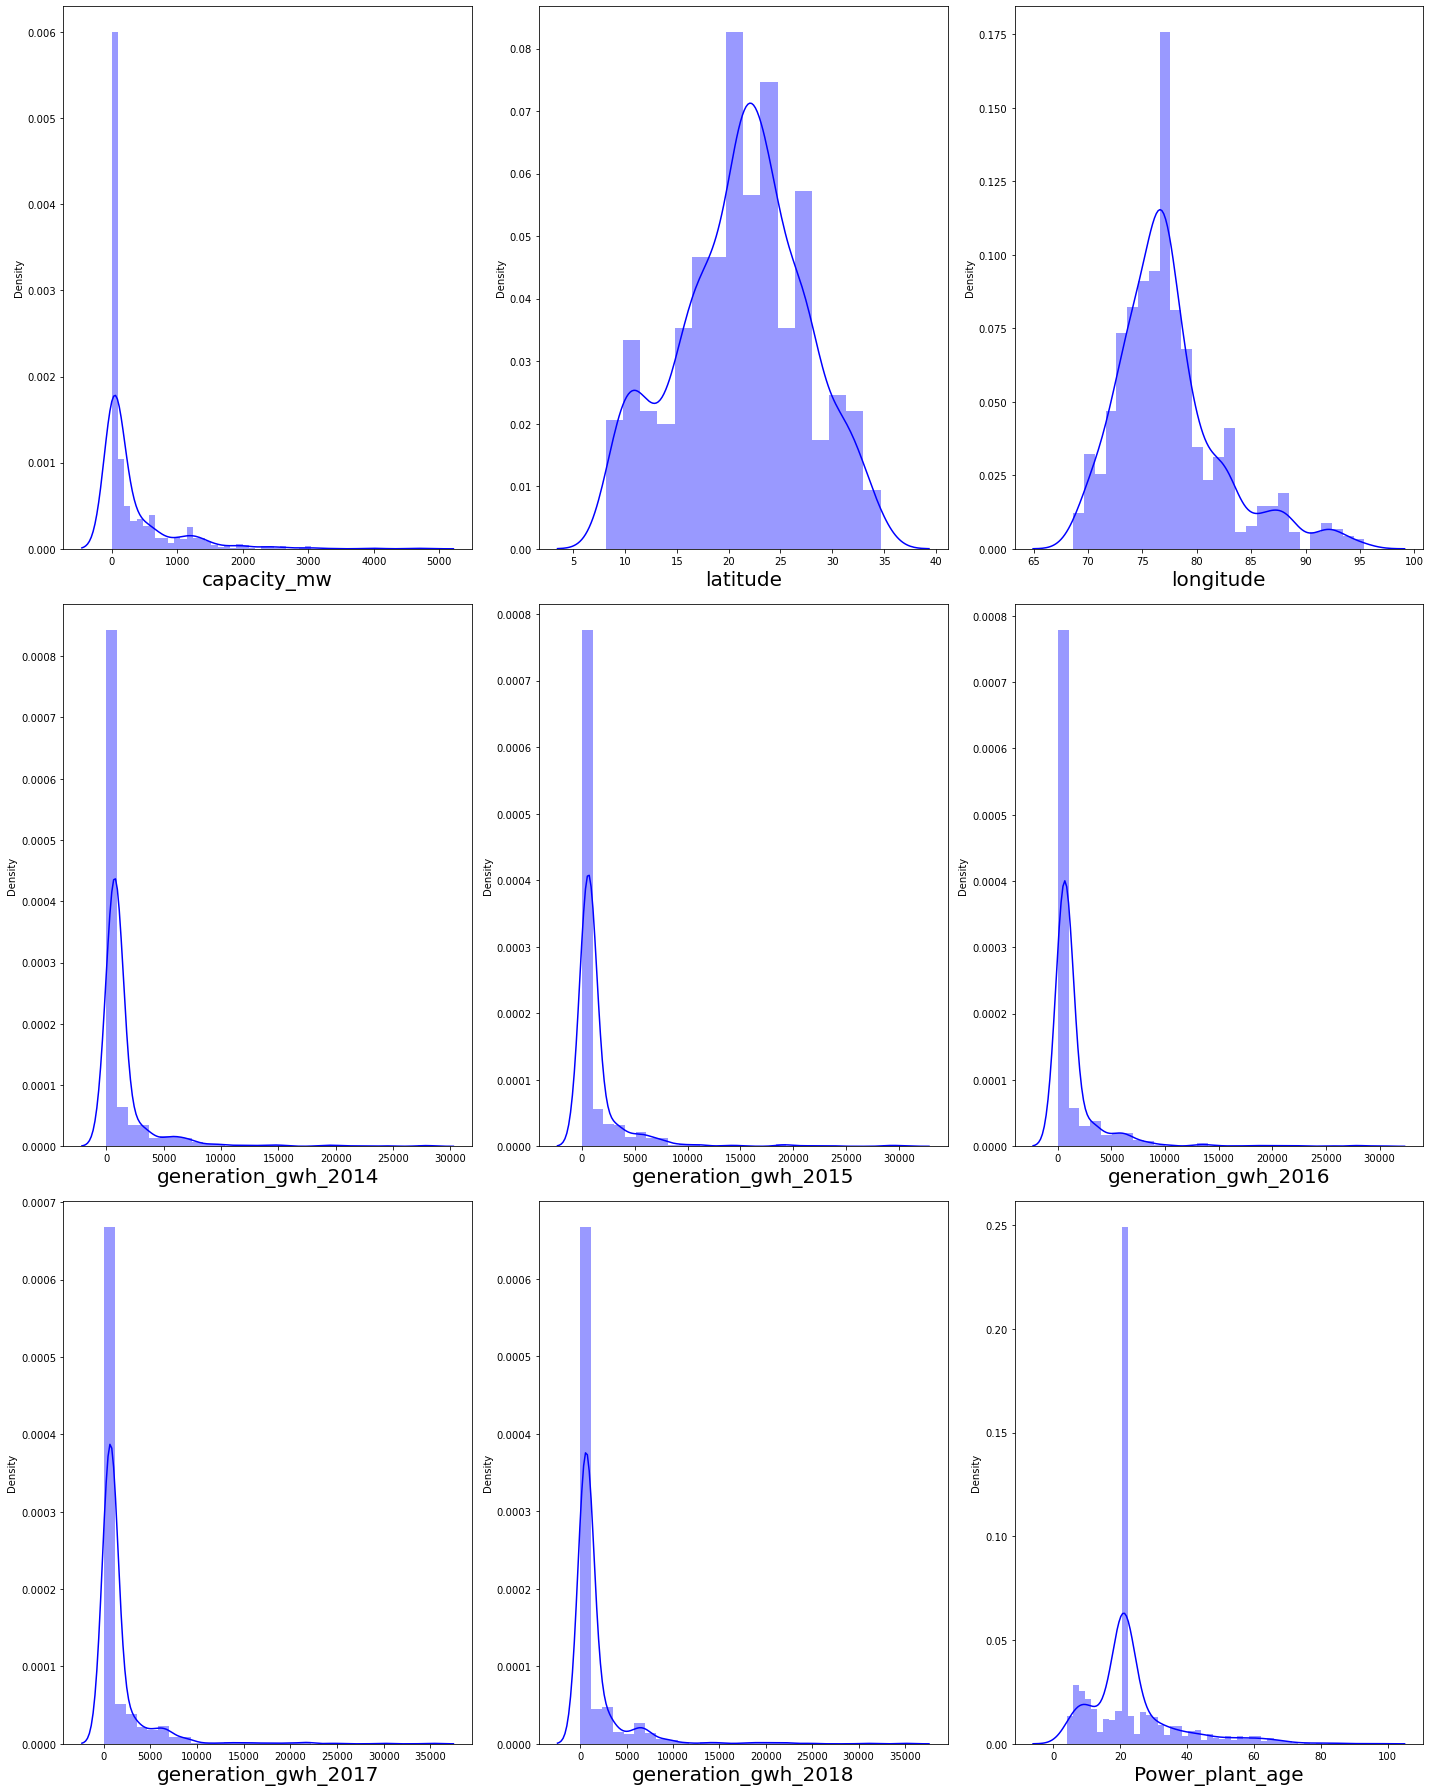

In [35]:
# checking how the data has been distributed in each column

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

**Observation** :-

- From the above distribution plots we can observe that the data is not normally distributed in all the columns except   latitude and longitude.
- In most of the columns the mean is greater than the median which means they are skewed to right.
- We will remove these skewness in all the coluns except the label in the later part.

* **Plotting categorical columns:**

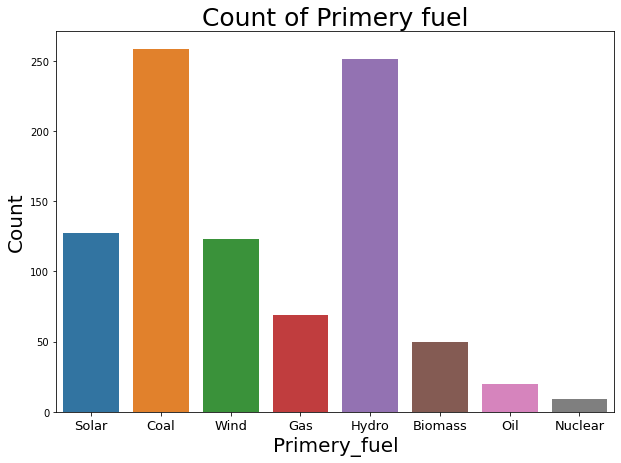

In [36]:
# Visualizing  the types of fuel in primary_fuel
plt.figure(figsize = (10,7))
sns.countplot(x="primary_fuel", data=df)

plt.title('Count of Primery fuel',fontsize=25)
plt.xlabel('Primery_fuel',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

**In the above cell the count plot shows the energy source used in primary electricity generation:**
* In the above count plot for "primary_fuel" column we can see that the highest number of values have been covered by coal and hydro fuel types then comes solar and wind.
* Finally we see that gas, biomass, oil and nuclear have very low data counts.

-The Data is not balanced so will balance the data later.*

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


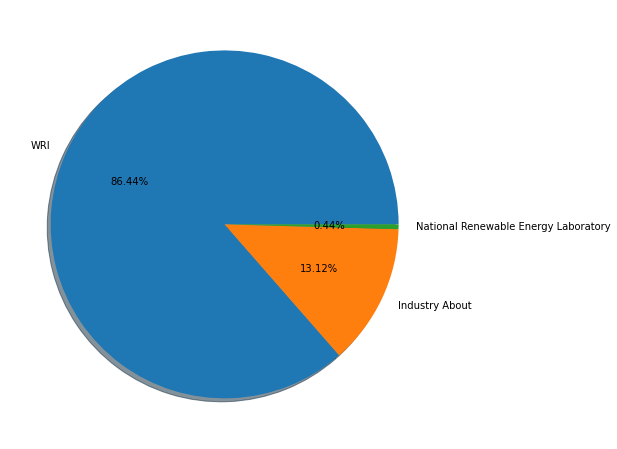

In [37]:
#Visualizing the counts of geolocation_source.
print(df['geolocation_source'].value_counts())

labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

* As in the above cell the plot shows that the geolocation source World Resources Institute(WRI) has highest counts which means WRI gives the more geolocation information compare to other two sources.

* **Plotting Numerical Columns:**

## Comparing target varibale 'capacity_mw' with features:

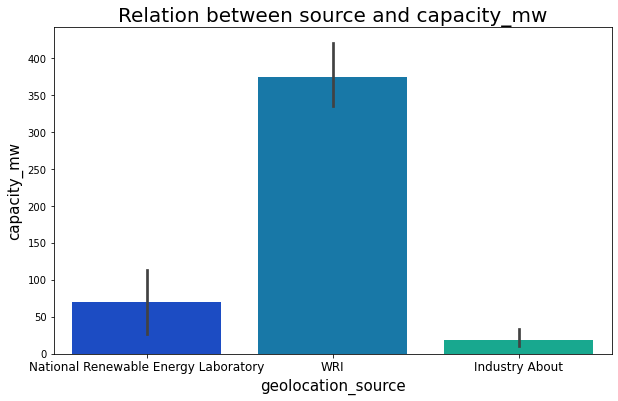

In [38]:
# let's check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = 'geolocation_source', y = 'capacity_mw', data=df,  palette="winter")

plt.title('Relation between source and capacity_mw',fontsize=20)
plt.xlabel('geolocation_source',fontsize=15)
plt.ylabel('capacity_mw',fontsize=15)
plt.xticks(fontsize=12) #,rotation=30)

plt.show()

* The capacity of geolocation source WRI is maximum which has capacity more than 350 mega watts. The geolocation source industry about has less capacity

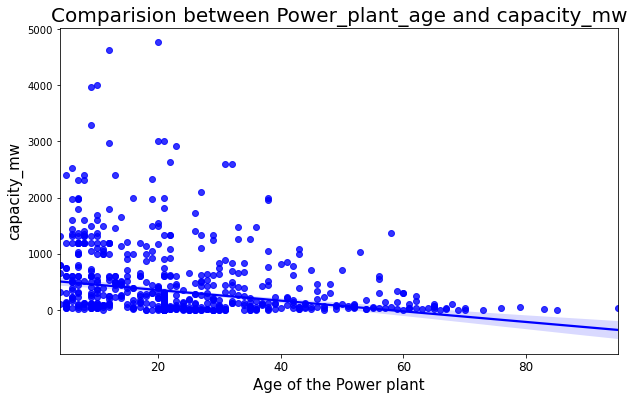

In [39]:
# Let's check how the Power_plant_age affects the capacity of the power plant
plt.figure(figsize=[10,6])
sns.regplot(df['Power_plant_age'],df['capacity_mw'],color = 'b')

plt.title('Comparision between Power_plant_age and capacity_mw',fontsize=20)
plt.xlabel('Age of the Power plant',fontsize=15)
plt.ylabel('capacity_mw',fontsize=15)
plt.xticks(fontsize=12)

plt.show()

* From the above plot we can observe that there is negative linear relationship between feature and label also we can infer that the capacity of older power plants is very less compared to the power plants which are started recently.

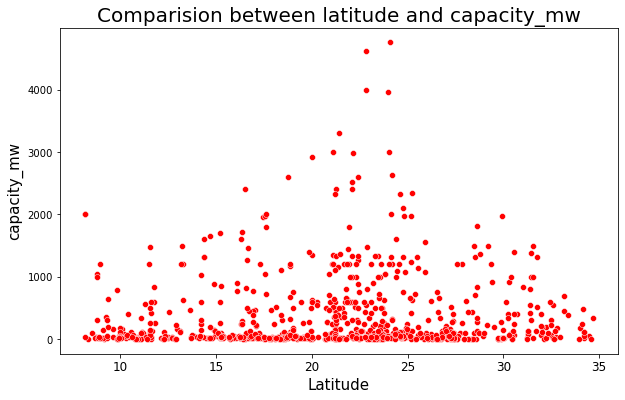

In [40]:
# let's check how the capacity is related to latitude  of the power plant
plt.figure(figsize=[10,6])
sns.scatterplot(df['latitude'],df['capacity_mw'],color='r')

plt.title('Comparision between latitude and capacity_mw',fontsize=20)
plt.xlabel('Latitude',fontsize=15)
plt.ylabel('capacity_mw',fontsize=15)
plt.xticks(fontsize=12)

plt.show()

* The plot shows that there is no linear relation between latitude and capacity of the power plant . We can notice the capacity of power plant is very less in this case also we can see some outliers present hear.

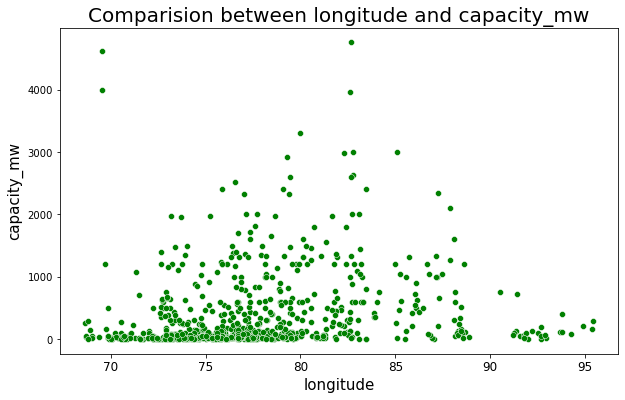

In [41]:
# let's check how the longitude related to the capacity of the power plant
plt.figure(figsize=[10,6])
sns.scatterplot(df['longitude'],df['capacity_mw'],color='g')

plt.title('Comparision between longitude and capacity_mw',fontsize=20)
plt.xlabel('longitude',fontsize=15)
plt.ylabel('capacity_mw',fontsize=15)
plt.xticks(fontsize=12)

plt.show()

* There is very weak linear relation between longitude and capacity. Here the longitude ranges from 74-82 has more capacity upto 2000. And we can also observe the presence of outliers.

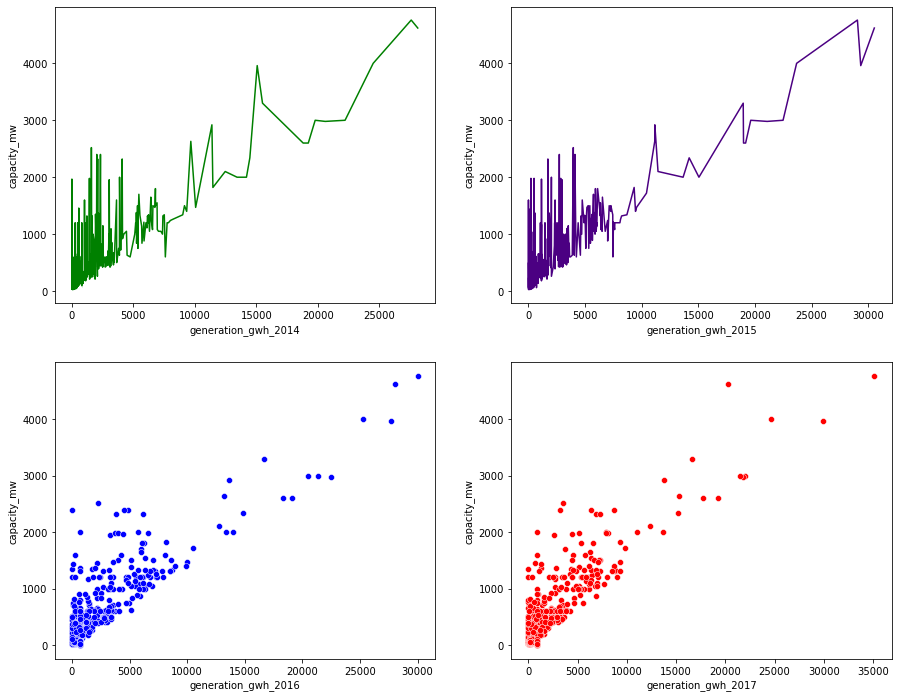

In [42]:
# let's check the capacity of the plant with respect to generation_gwh_2014, 2015, 2016 & 2017.

fig,axes=plt.subplots(2,2,figsize=(15,12))

# checking attrition level in Dailyrate
sns.lineplot(x='generation_gwh_2014', y='capacity_mw',ax=axes[0,0],data=df,color='g')

# checking attrition level in hourlyrate
sns.lineplot(x='generation_gwh_2015', y='capacity_mw',ax=axes[0,1],data=df,color='indigo')

# checking attrition level in Monthlyrate
sns.scatterplot(x='generation_gwh_2016', y='capacity_mw',ax=axes[1,0],data=df,color='b')

# checking attrition level Monthlyincome
sns.scatterplot(x='generation_gwh_2017', y='capacity_mw',ax=axes[1,1],data=df,color='r')
plt.show()

**Observation :-**

- There is positive linear relationship between the capacity and the electricity generation reported for the years mentioned.
- The plot shows how the electricity generation reported for the years 2014 , 2015, 2016, 2017 have high capacity of above 1000mw . Also power generation growrh is more than 5000gwh in all the years.
- As the electricity generation growth increases, the capacity of plant is also increasing moderately.

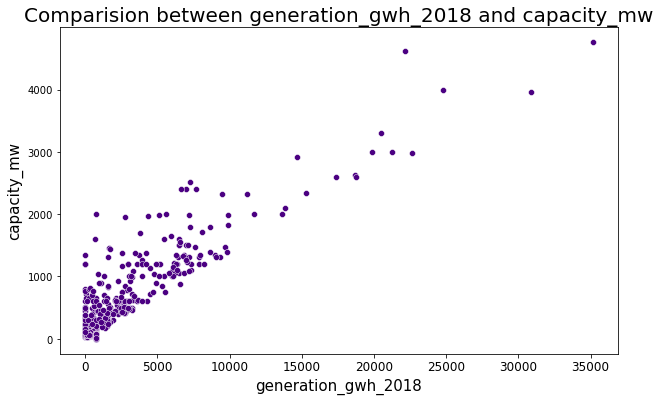

In [43]:
# checking attrition level Monthlyincome
plt.figure(figsize = (10,6))
sns.scatterplot(x='generation_gwh_2018', y='capacity_mw',data=df,color='indigo')

plt.title('Comparision between generation_gwh_2018 and capacity_mw',fontsize=20)
plt.xlabel('generation_gwh_2018',fontsize=15)
plt.ylabel('capacity_mw',fontsize=15)
plt.xticks(fontsize=12)

plt.show()

* here is positive linear relationship between the capacity and the electricity generation reported for the year 2018.

## Comparing the target variable 'primary_fuel' with other features:

In [44]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'source',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'Power_plant_age'],
      dtype='object')

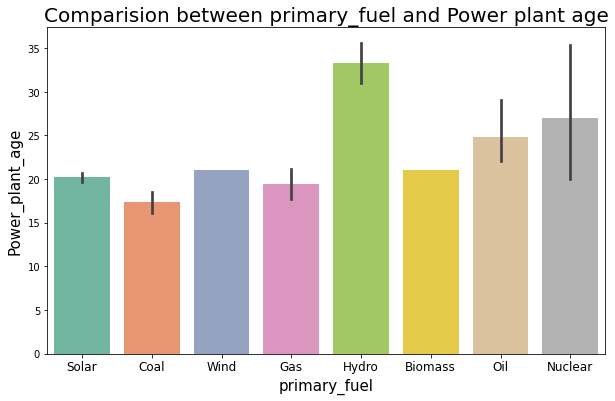

In [45]:
# Lets check how the power plant age affects Fuel Type
plt.figure(figsize = (10,6))
sns.barplot(x='primary_fuel',y='Power_plant_age', data=df, palette="Set2")

plt.title('Comparision between primary_fuel and Power plant age',fontsize=20)
plt.xlabel('primary_fuel',fontsize=15)
plt.ylabel('Power_plant_age',fontsize=15)
plt.xticks(fontsize=12)

plt.show()

* From the above cell we can see most of the power plants uses Hydro(water) to generate the electricity followed by Nuclear and Oil.
* The power plants which are recently constructed uses Solar, Coal and Gas to gererate the power.

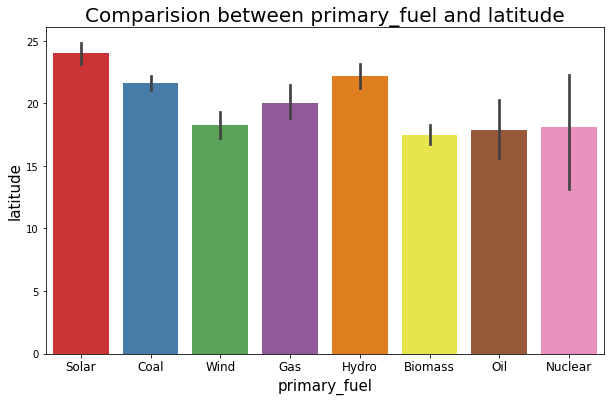

In [46]:
# Lets check how the fuel type is related to latitude of the power plant 
plt.figure(figsize = (10,6))
sns.barplot(x='primary_fuel',y='latitude', data=df, palette="Set1")

plt.title('Comparision between primary_fuel and latitude',fontsize=20)
plt.xlabel('primary_fuel',fontsize=15)
plt.ylabel('latitude',fontsize=15)
plt.xticks(fontsize=12)

plt.show()

* So here we can observe that the fuel type Solar has high latitude of above 20 followed by Hydro, Coal and Gas . Apart from these types others have less latitude.

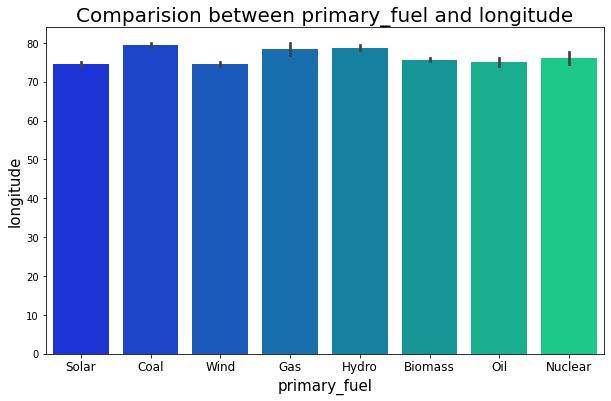

In [47]:
# Lets check how the fuel type is related to longitude of the power plant 
plt.figure(figsize = (10,6))
sns.barplot(x='primary_fuel',y='longitude', data=df, palette="winter")

plt.title('Comparision between primary_fuel and longitude',fontsize=20)
plt.xlabel('primary_fuel',fontsize=15)
plt.ylabel('longitude',fontsize=15)
plt.xticks(fontsize=12)

plt.show()

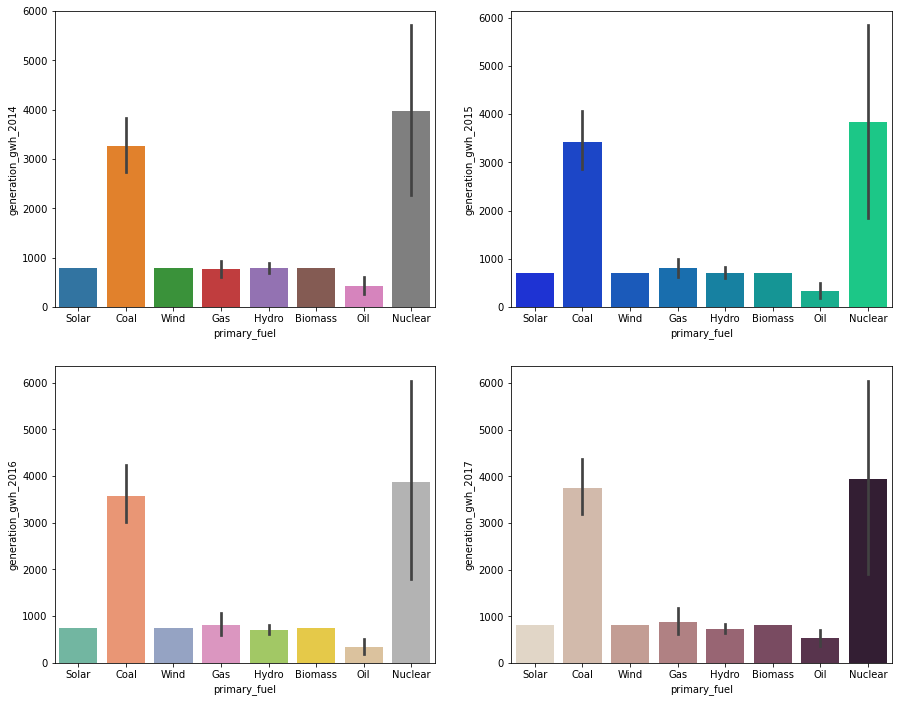

In [48]:
# let's check the fuel type with respect to generation_gwh_2014, 2015, 2016 & 2017.
fig,axes=plt.subplots(2,2,figsize=(15,12))

#checking attrition level in Dailyrate
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,0],data=df)

# checking attrition level in hourlyrate
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[0,1],data=df, palette="winter")

# checking attrition level in Monthlyrate
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,0],data=df,palette="Set2")

# checking attrition level Monthlyincome
sns.barplot(x='primary_fuel',y='generation_gwh_2017',ax=axes[1,1],data=df,palette="ch:.25")
plt.show()

* From the graph we can notice the fuel type Nuclear has high electrical generation reports for all the years followed by Coal.
* Other fuel types have very less power generation reports.

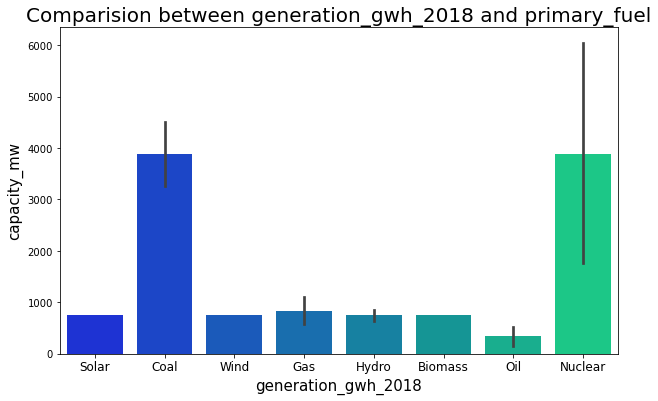

In [49]:
# checking attrition level Monthlyincome
plt.figure(figsize = (10,6))
sns.barplot(x='primary_fuel',y='generation_gwh_2018',data=df, palette="winter")

plt.title('Comparision between generation_gwh_2018 and primary_fuel',fontsize=20)
plt.xlabel('generation_gwh_2018',fontsize=15)
plt.ylabel('capacity_mw',fontsize=15)
plt.xticks(fontsize=12)

plt.show()

* Here also, we can notice the fuel type Nuclear has high electrical generation reports followed by Coal.
* Other fuel types have very less power generation reports.

### Checking the relation between targets:

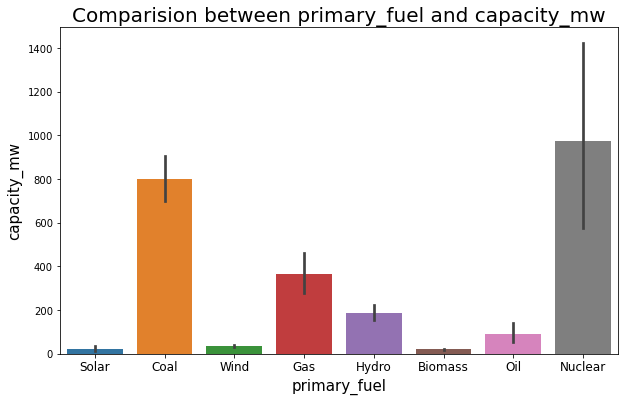

In [50]:
plt.figure(figsize = (10,6))
sns.barplot(x='primary_fuel',y='capacity_mw', data=df) #, palette="winter")

plt.title('Comparision between primary_fuel and capacity_mw',fontsize=20)
plt.xlabel('primary_fuel',fontsize=15)
plt.ylabel('capacity_mw',fontsize=15)
plt.xticks(fontsize=12)

plt.show()

* **The plot shows that the capacity of generating electricity is high in Nuclear followed by Coal.**
* **Also the electricity generating capacity is very less in Solar, Biomass, Wind and other plants.**

### Multivariate Analysis:
* Since we have 2 target variables capacity_mw and Fuel_Type, will check the pairwise relation for the features with both the targets separately.

C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping de

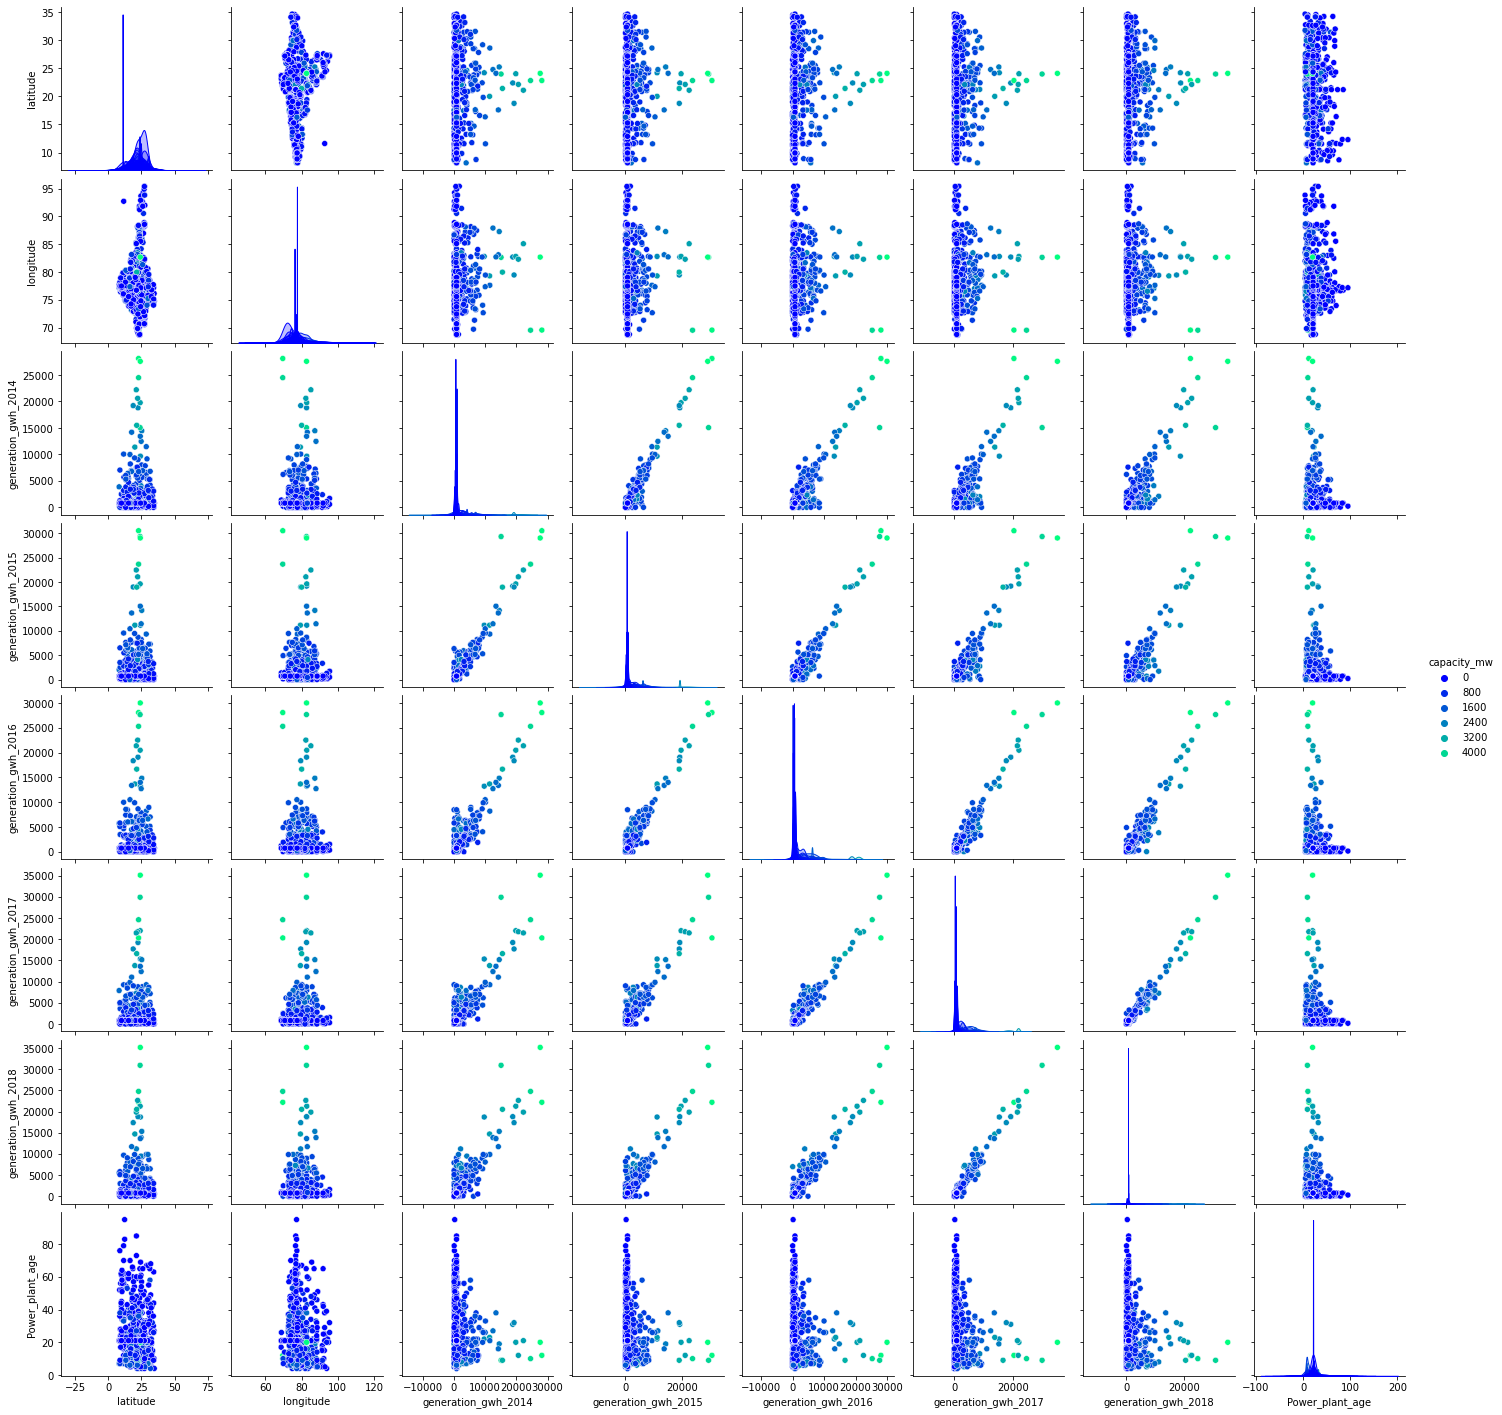

In [51]:
# checking the pairwise relation between the features and label capacity in megawatt.
sns.pairplot(df,hue='capacity_mw',palette='winter')

* This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable 'capacity_mw'. Here we can observe the relation between the features and label.
* Most of the features have strong linear relationship and correlation with each other.
* From the plot we can also observe the outliers in some of the columns .

C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping de

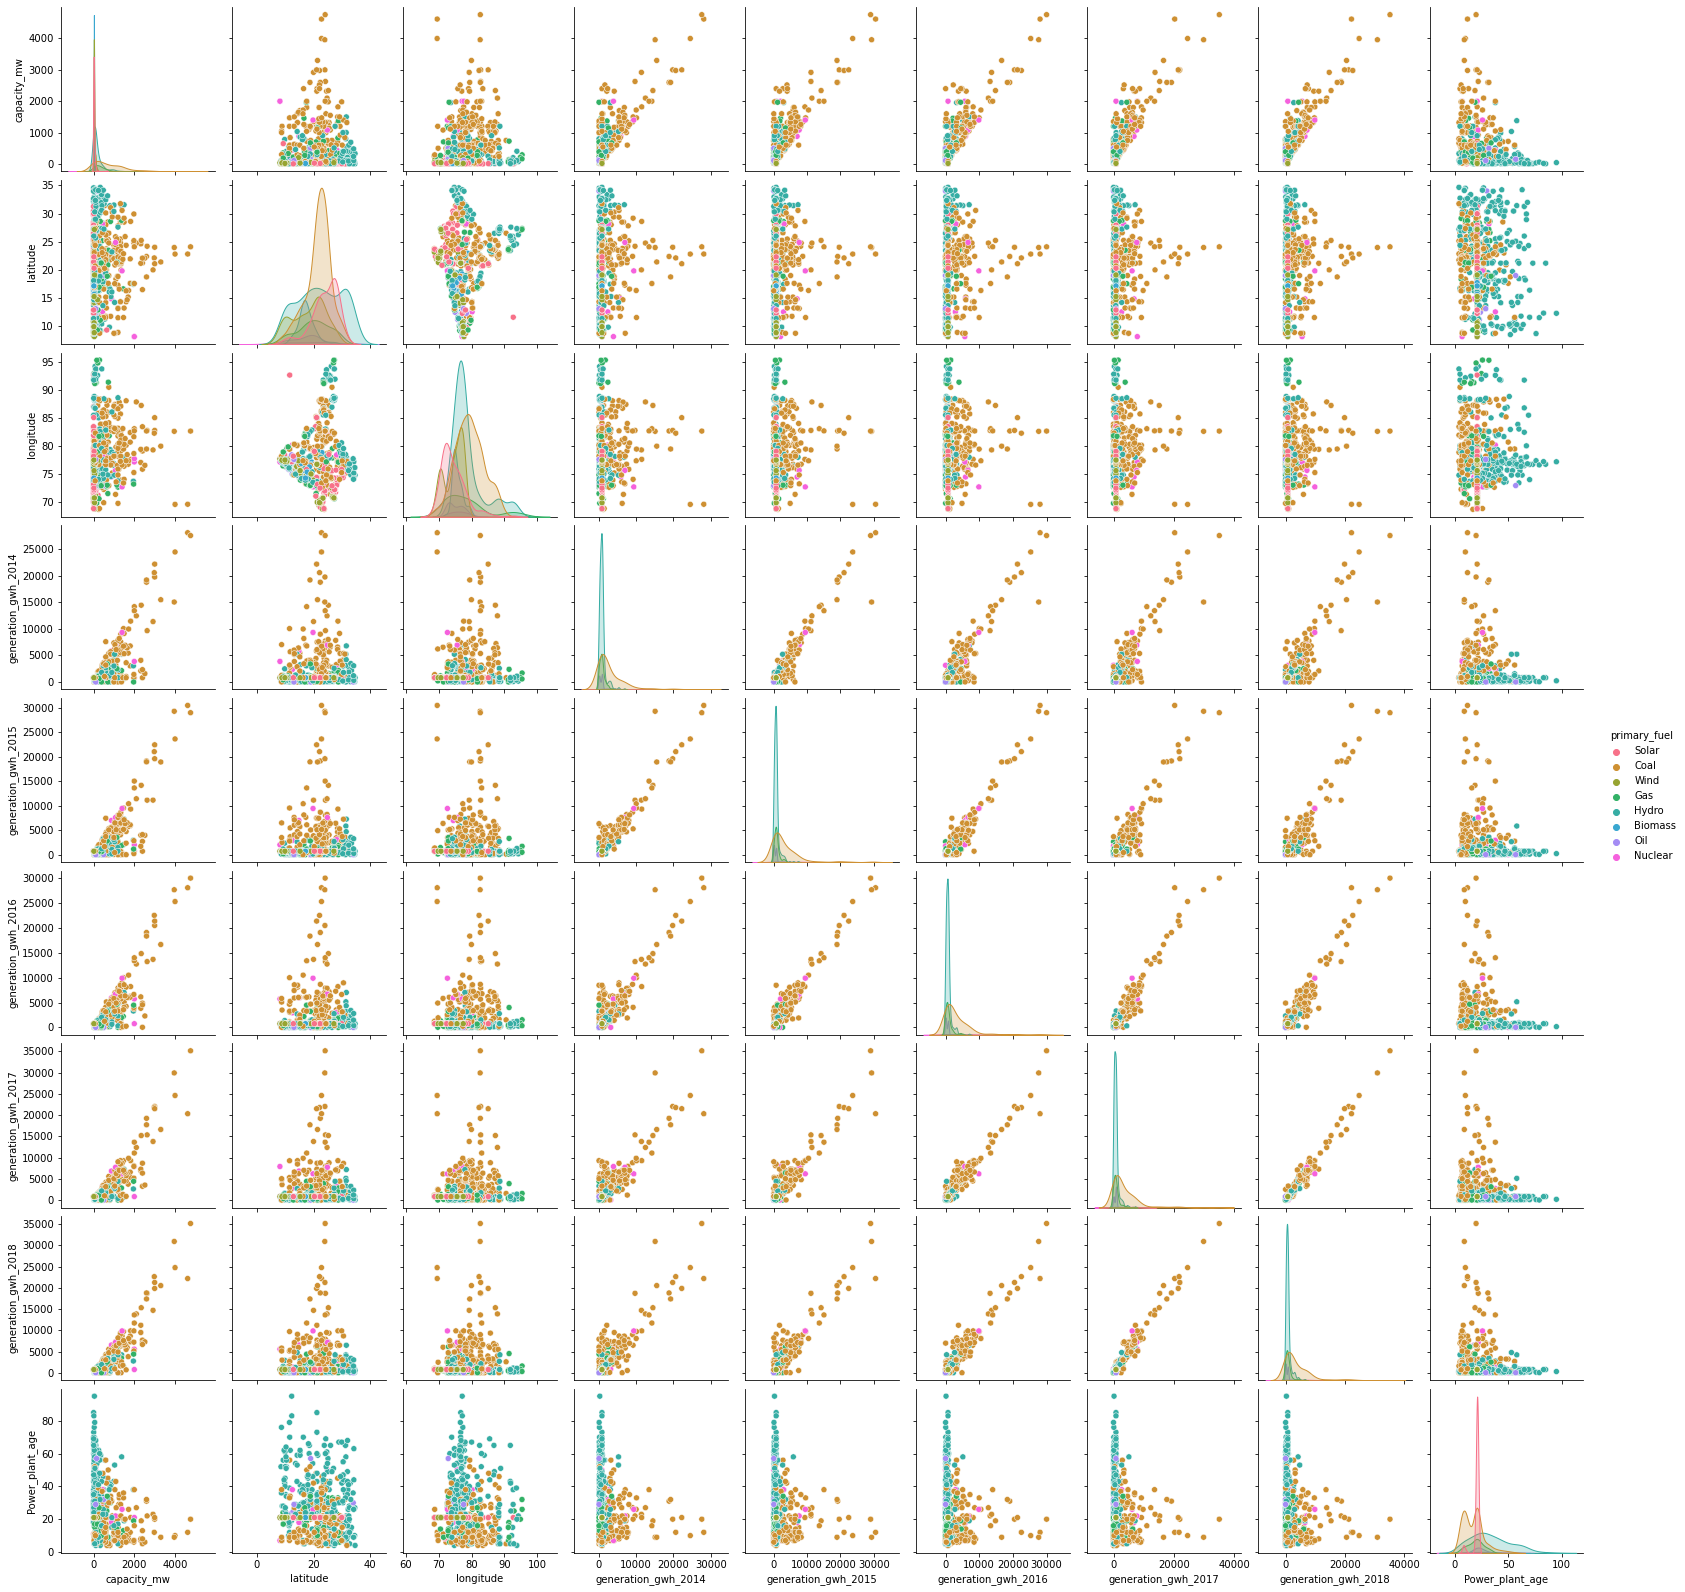

In [52]:
# checking the pairwise relation between the features and lavel primary_fuel.
sns.pairplot(df,hue='primary_fuel',palette='husl')

* This pair plot gives the pairwise relations of the features on the basis of target variable 'primary_fuel' and we can notice most of the features are highly correlated with each other.
* Most of the columns have strong linear relationship also there are huge outliers present in the columns . So will remove these outliers in the later part.

## Outliers Handling

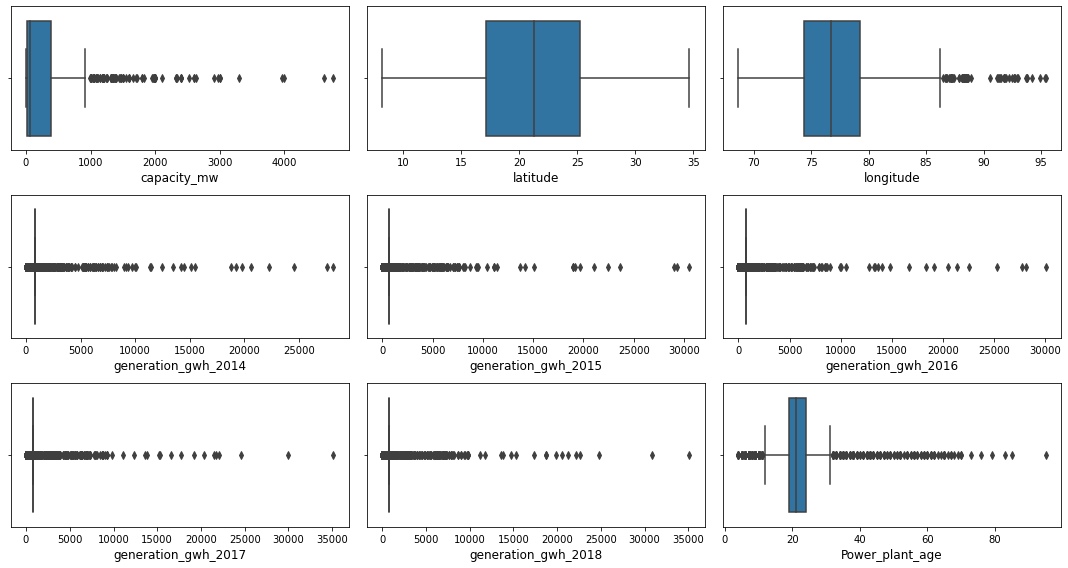

In [53]:
# indentifying the outlierspresent in numerical columns using boxplot

plt.figure(figsize=(15,8),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

* In the boxplot we can notice the outliers present in all columns except latitude. Even target column has outliers but no need to remove it.
* Let's remove outliers using ZSCORE method.

### Removing Outliers

In [54]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'source',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'Power_plant_age'],
      dtype='object')

### 1. ZSCORE method:

In [55]:
# features containing outliers
features = df[['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']]

In [56]:
#using zscore method to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))
z

array([[0.86991672, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.93307603],
       [0.58558978, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871],
       [1.67356683, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871],
       ...,
       [0.38359152, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871],
       [0.76456427, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871],
       [0.0103269 , 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871]])

* So here we have removed the outliers.

In [57]:
# creating new dataframe

new_df= df[(z<3).all(axis=1)]
new_df

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,11.0
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,21.0
2,39.2,21.9038,69.3732,Wind,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,21.0
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,18.0
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,6.0
903,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,21.0
904,25.5,15.2758,75.5811,Wind,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,21.0
905,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,21.0


* SO here we can see the new dataframe after removing the outliers. Here we have removed the outliers whose zscore is less than 3.

In [58]:
df.shape

(907, 12)

* Before removing outliers we had 908 rows and 13 columns in the dataset.

In [59]:
new_df.shape

(851, 12)

* After removing the outliers we have 852 rows and 13 columns.

In [60]:
# checking the data loss
data_loss = (908-852)/908*100
print(f"""data_loss : {data_loss} %""")

data_loss : 6.167400881057269 %


* Here We are losing only 6% of data by removing outliers using zscore. Then remove the outliers and check data loss % by using IQR method.

### 2. IQR METHOD(Inter Quantile Range):

In [61]:
Q1 = features.quantile(0.25)

Q3 = features.quantile(0.75)

#IQR
IQR = Q3-Q1

df1= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [62]:
df1.shape

(420, 12)

* So we can notice here that after using IQR method data have 422 rows and 13 columns.

In [63]:
# let's check the dataloss
data_loss = (908-422)/908*100
print(f"""data_loss : {data_loss} %""")

data_loss : 53.524229074889874 %


* We can observe here that using IQR method we are losing 53% of data which is huge. so considering zscore method for better result.

### Encoding the categorical columns using Label Encoding:

In [64]:
categorical_col

['primary_fuel', 'source', 'geolocation_source']

In [65]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
new_df[categorical_col]=new_df[categorical_col].apply(LE.fit_transform)

C:\Users\Abhimanyu\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [66]:
new_df[categorical_col]

,primary_fuel,source,geolocation_source
0,6,109,1
1,1,174,2
2,7,21,2
3,2,22,2
4,1,22,2
...,...,...,...
902,1,22,2
903,6,77,0
904,7,21,2
905,1,59,2


* Now we have encoded the categorical columns using label encoding method.

### Correlation between the target variable and features using HEAT MAP:

In [67]:
# checking the correlation between features and the target
cor = new_df.corr()
cor

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.050588,0.257582,-0.398039,-0.275724,0.234543,0.620202,0.680949,0.750088,0.788972,0.815198,-0.241487
latitude,0.050588,1.000000,-0.014145,-0.002561,0.069430,-0.203340,0.081661,0.071346,0.057301,0.071296,0.064558,-0.097033
longitude,0.257582,-0.014145,1.000000,-0.382975,-0.235719,0.263739,0.119473,0.154522,0.195299,0.196529,0.204421,-0.080034
primary_fuel,-0.398039,-0.002561,-0.382975,1.000000,0.038558,-0.478601,-0.250101,-0.276308,-0.286624,-0.289232,-0.298364,0.074358
source,-0.275724,0.069430,-0.235719,0.038558,1.000000,-0.497893,-0.141496,-0.156317,-0.158561,-0.156155,-0.165232,-0.075353
geolocation_source,0.234543,-0.203340,0.263739,-0.478601,-0.497893,1.000000,0.113446,0.125329,0.127128,0.125199,0.132477,0.051608
generation_gwh_2014,0.620202,0.081661,0.119473,-0.250101,-0.141496,0.113446,1.000000,0.912185,0.801237,0.746130,0.738063,-0.059768
generation_gwh_2015,0.680949,0.071346,0.154522,-0.276308,-0.156317,0.125329,0.912185,1.000000,0.907984,0.830394,0.821726,-0.130252
generation_gwh_2016,0.750088,0.057301,0.195299,-0.286624,-0.158561,0.127128,0.801237,0.907984,1.000000,0.932729,0.913720,-0.199087
generation_gwh_2017,0.788972,0.071296,0.196529,-0.289232,-0.156155,0.125199,0.746130,0.830394,0.932729,1.000000,0.964318,-0.221382


* This gives the correlation between the dependent and independent variables. We can visualize this by plotting heat map.


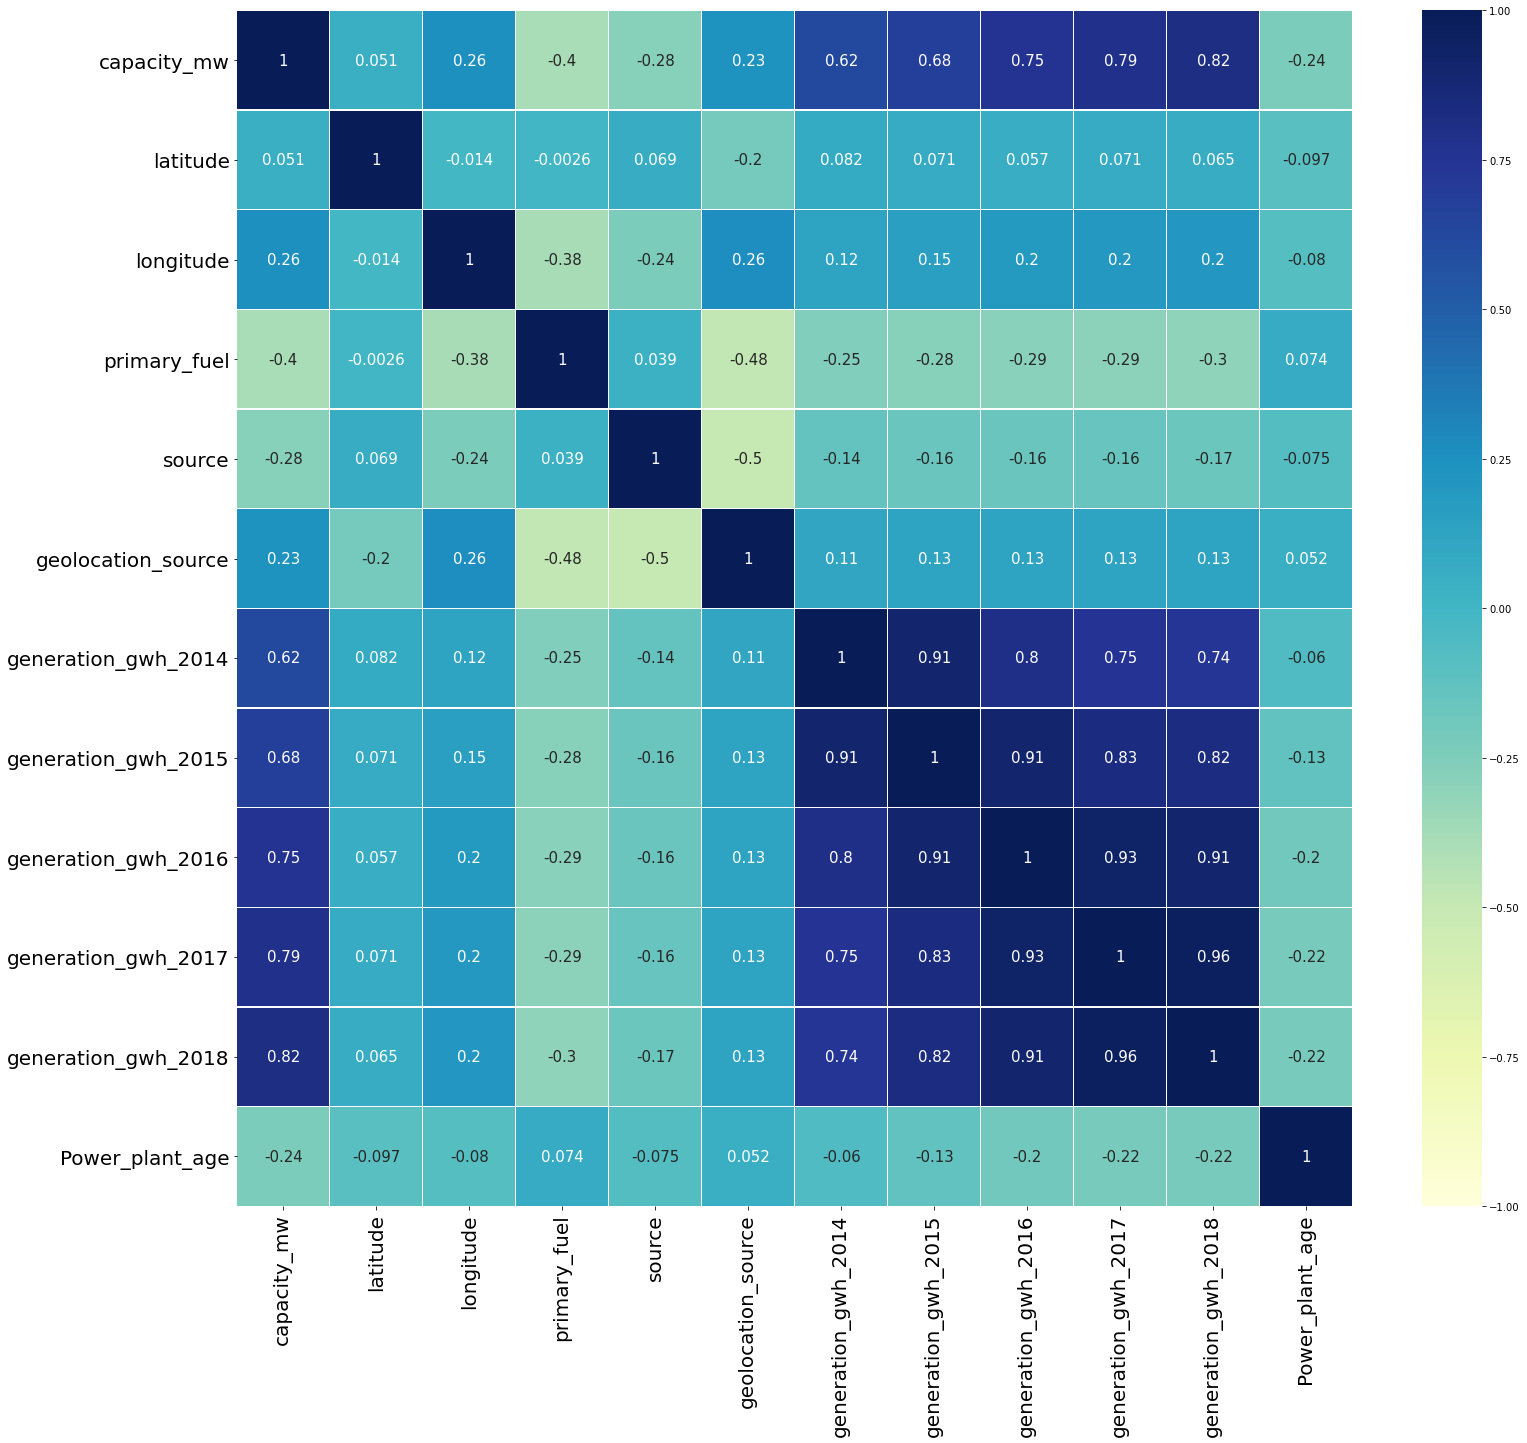

In [68]:
# visualizing the correlation matrix by plotting heat map

plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True,annot_kws={'size':15},cmap="YlGnBu")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20,rotation=0);

This heatmap Shows the correlation matrix by visualizing the data .

* We can observe the relation between feature to feature and feature to label.
* This heat map contains both positive and negative correlation.


**Correlation between capacity_mw and features:**
* The label capacity_mw is highly positively correlated with the features generation_gwh_2018, generation_gwh_2017, generation_gwh_2016, generation_gwh_2015 , generation_gwh_2014.
* & the label is negatively correlated with the features Fuel_Type, source and Power_plant_age.
* The column latitude has no relation with the label, so we can drop it.

**Correlation between Fuel_Type and features:**
* The label Fuel_Type is less correlate with Power_plant_age and source
* The label is negatively correlated with geolocation_souce, longitude, capacity_mw and all generation_gwh years
* From the heat map we can notice most of the features are highly correlated with each other which leads to multicollinearty problem. So will try to solve this problem by Checking VIF value befor building our models.
* Also the feature latitude have very less correlation with both the labels . Let's drop those columns.

### Visualizing the correlation between label and features using bar plot:

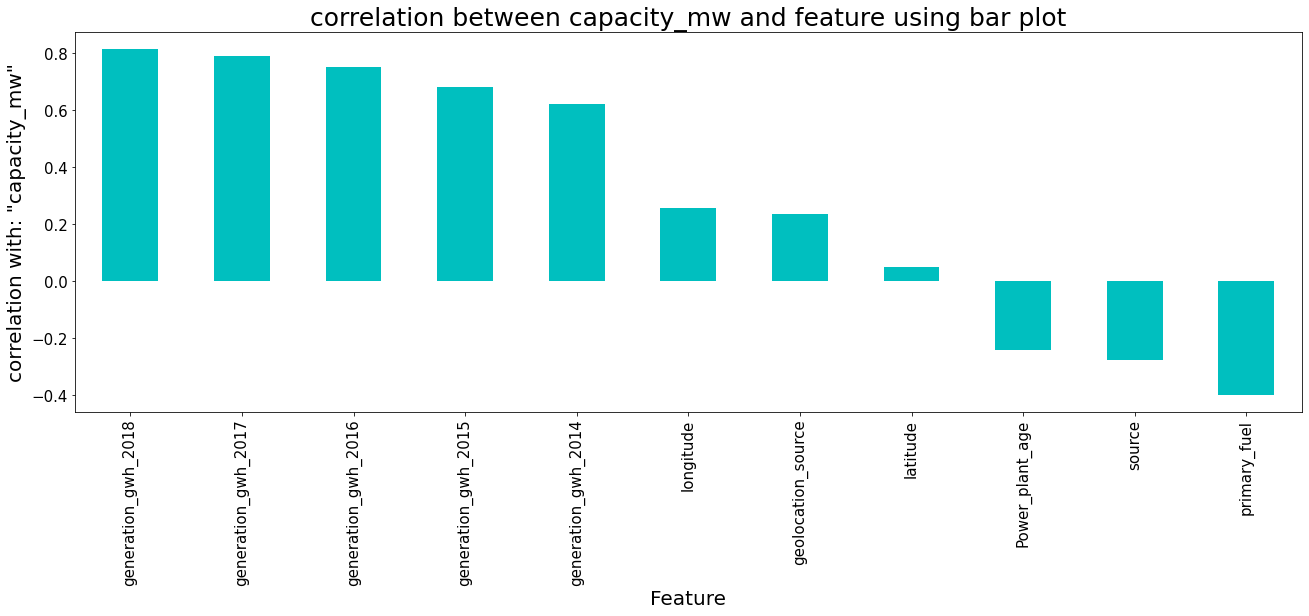

In [69]:
# correlation between capacity_mw and feature using bar plot
plt.figure(figsize=(22,7))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')

plt.title('correlation between capacity_mw and feature using bar plot',fontsize=25)
plt.xlabel('Feature',fontsize=20)
plt.ylabel('correlation with: "capacity_mw"',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

* This is the bar plot to check the correlation between capacity_mw and features . Here we can easily notice the positive and negative correlation between the features and the label.

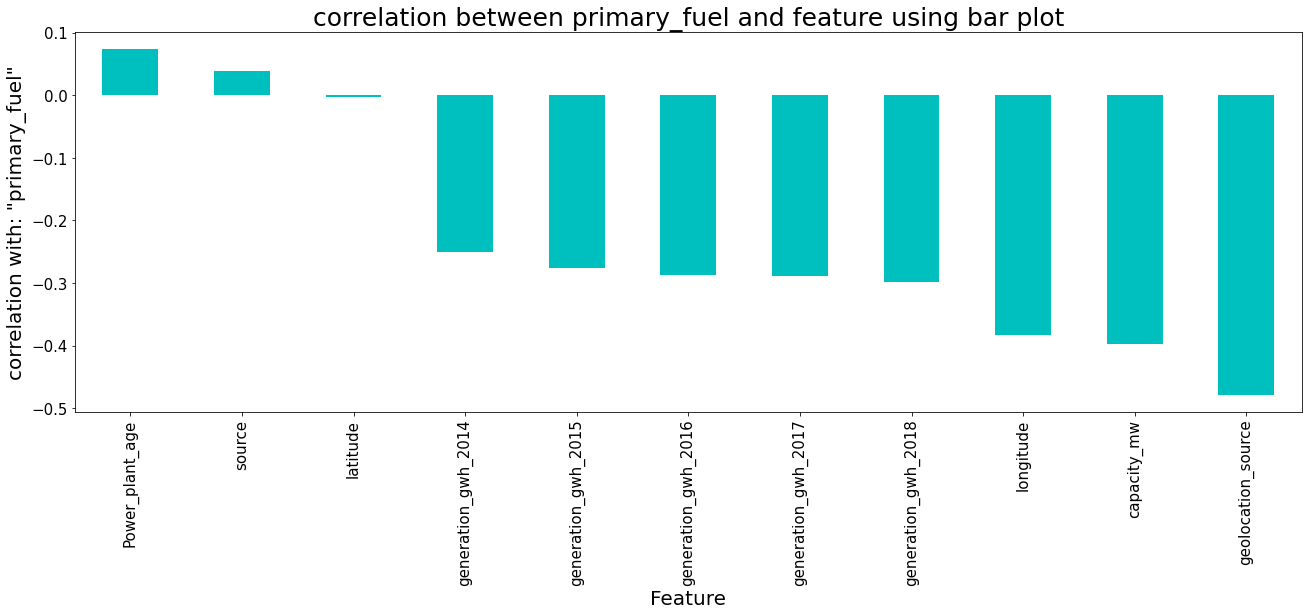

In [70]:
# correlation between primary_fuel and feature using bar plot
plt.figure(figsize=(22,7))
new_df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')

plt.title('correlation between primary_fuel and feature using bar plot',fontsize=25)
plt.xlabel('Feature',fontsize=20)
plt.ylabel('correlation with: "primary_fuel"',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

* This is the bar plot to check the correlation between Fuel_Type and features. Here we can easily notice the positive and negative correlation between the features and the label.

* From both the bar plots we can observe that the column latitude has very less correlation with both the labels capacity_mw and Fuel_Type. Let's drop this column.

In [71]:
# dropping irrelevant columns

new_df.drop('latitude',axis=1,inplace=True)

C:\Users\Abhimanyu\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [72]:
new_df.head()

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,11.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,21.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,21.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,18.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,7.0


* **First we will predict '*capacity_mw prediction*', since the target variable '*capacity_mw*' has continuous data so it is a "Regression problem".**
* **After this will move to '*primary_fuel(Fuel Type)*' prediction which is "Classfication problem".**

# 1. Prediction for 'capacity_mw':

In [73]:
# Separating the features and label variables into x and y

x= new_df.drop('capacity_mw',axis=1)
y= new_df['capacity_mw']

In [74]:
x.shape

(851, 10)

In [75]:
y.shape

(851,)

### Checking for SKEWNESS

In [76]:
x.skew()

longitude              0.945877
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

* We can see that some of our columns have more than +/-0.5 skewness , we will remove it by power transformation.
* Also the columns - source and geolocation_source are categorical so no need to remove skewness in these columns.

#### Removing Skewness using yeo-johnson method:

In [77]:
skew = ['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.110868
1,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
2,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
3,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.249172
4,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.779328


In [78]:
# checking skewness after using yeo-johnson method
x.skew()

longitude             -0.000128
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.022168
dtype: float64

* SO here successfully removed the skewness from all the numerical columns using yeo-johnson method.


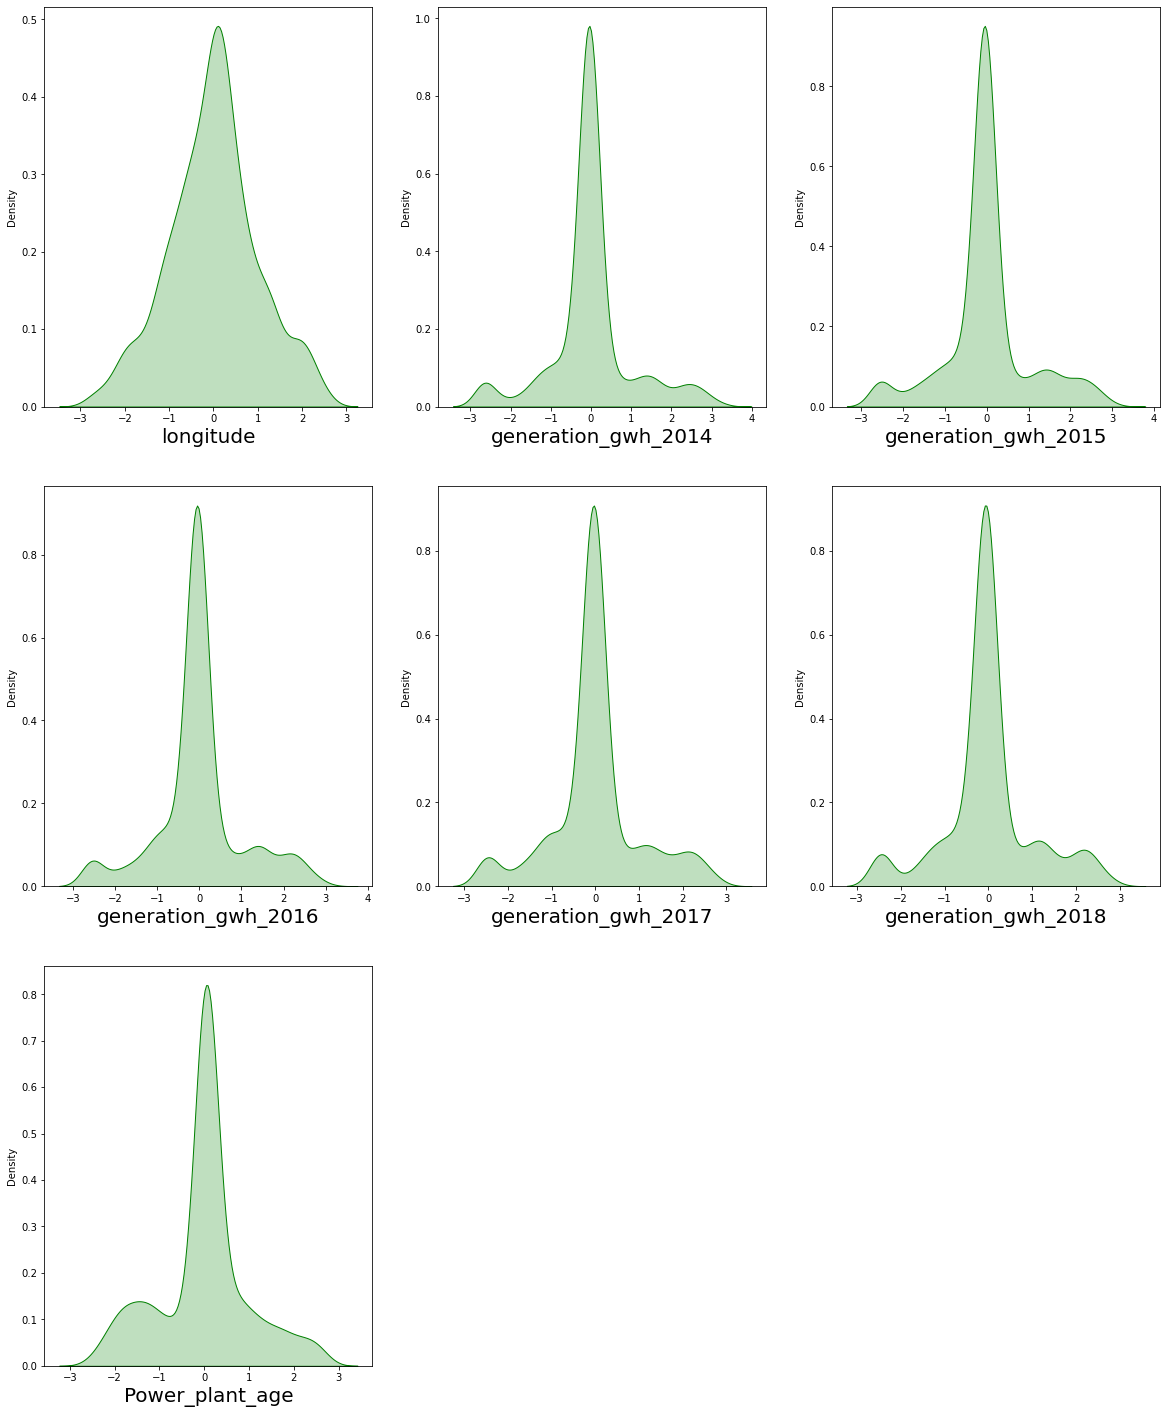

In [79]:
# checking how the data has been distributed in each columns.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={'shade': True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

* The data is not normal but the skewness has been reduced in all the columns.

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,1.175506,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.110868
1,-0.499829,-0.975797,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
2,-2.377759,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
3,2.430594,-0.545536,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.249172
4,1.261979,-0.975797,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.779328
...,...,...,...,...,...,...,...,...,...,...
846,0.231932,-0.975797,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.982411
847,0.421592,1.175506,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
848,-0.224400,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
849,-0.760624,-0.975797,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442


* So here scaled the data using standard scalarization method to overcome with the issue of data biasness.

* **As we have observed in the heat map there is multicolinearity issue exists in the data. So let's check the VIF value and if the columns have VIF > 10 then we can drop those columns**.

### Checking VIF (Variance Inflation Factor ) Values:

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for  i in range(len(x.columns))]
vif['features'] = x.columns

# let's check the values
vif

,VIF values,features
0,1.310090,longitude
1,1.683269,primary_fuel
2,1.503765,source
3,1.875821,geolocation_source
4,3.606669,generation_gwh_2014
5,6.181445,generation_gwh_2015
6,9.956016,generation_gwh_2016
7,9.748587,generation_gwh_2017
8,8.950941,generation_gwh_2018
9,1.105444,Power_plant_age


SO here we can observe all the columns have VIF less than 10 .
* Which means we are free from multicolinearity problem .

In [82]:
# DataFrame after preprocessing and data cleaning
x.head()

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,1.175506,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.110868
1,-0.499829,-0.975797,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
2,-2.377759,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
3,2.430594,-0.545536,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.249172
4,1.261979,-0.975797,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.779328


In the above cell we can see the dataframe after cleaning and preprocessing.

* Here We have done with the preprocessing and data cleaning .
-Now let's move to build the model.

## Modeling:

* **Finding best random state**

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [84]:
from sklearn.ensemble import RandomForestRegressor

maxAccu=0
maxRS=0

for i in range(1,350):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test,pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Maximum r2 score (Best Accuracy) is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score (Best Accuracy) is  0.8766128904517065  on Random_state  185


* So here we are getting the maximum R2 (best accuracy) Score more than 87% on the Random State 185.

### Creating new train test split:

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=maxRS)

## Regression Algorithms:

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

### 1. Random Forest Regressor:

In [87]:
# checking r2 score for random forest regressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR)*100,"%")
print('MAE:',metrics.mean_absolute_error(y_test,predRFR))
print('MSE:',metrics.mean_squared_error(y_test,predRFR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predRFR)))

R2_Score: 86.67235921187265 %
MAE: 79.84768619945928
MSE: 26331.091714620416
RNSE: 162.26857895051776


* The R2 score value for Random Forest Regressor model is 86%.

### 2. Decision Tree Regressor:

In [88]:
# checking r2 score for decision tree regressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR)*100,"%")
print('MAE:',metrics.mean_absolute_error(y_test,predDTR))
print('MSE:',metrics.mean_squared_error(y_test,predDTR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predDTR)))

R2_Score: 69.89360745039897 %
MAE: 112.15334138162306
MSE: 59480.45839636525
RNSE: 243.88615868139226


* So here the r2 score for Decision Tree Regressor is 70%

### 3. KNeighbors Regressor:

In [89]:
# checking r2 score for Kneighbors regressor
knn = KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn)*100,"%")
print('MAE:',metrics.mean_absolute_error(y_test,predknn))
print('MSE:',metrics.mean_squared_error(y_test,predknn))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predknn)))

R2_Score: 80.00040168544287 %
MAE: 103.29947981220657
MSE: 39512.71390397109
RNSE: 198.77805186682733


* So here r2 score for KNN is 80%.

### 4. Gradient Boosting Regressor:

In [90]:
# checking r2 score for gradient boosting regressor
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB)*100,"%")
print('MAE:',metrics.mean_absolute_error(y_test,predGB))
print('MSE:',metrics.mean_squared_error(y_test,predGB))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predGB)))

R2_Score: 85.29104238193601 %
MAE: 89.04067756581969
MSE: 29060.12536087619
RNSE: 170.4703063905154


* So here r2 score for Gradient Boosting Regressor is 85%.

### 5. Bagging Regressor:

In [91]:
# checking r2 score for bagging regressor
BR = BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR)*100,"%")
print('MAE:',metrics.mean_absolute_error(y_test,predBR))
print('MSE:',metrics.mean_squared_error(y_test,predBR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predBR)))

R2_Score: 83.41085979079956 %
MAE: 93.70296731149041
MSE: 32774.75580706505
RNSE: 181.03799547902935


* So here r2 score for Bagging Regressor is 83%.

## Checking the cross validation score:

In [92]:
# checking cv score for Random Forest Regressor
print(cross_val_score(RFR,x,y,cv=5).mean())

0.7804616809941098


In [93]:
# checking cv score for Decision Tree Regressor
print(cross_val_score(DTR,x,y,cv=5).mean())

0.5758140387968568


In [94]:
# checking cv score for KNN Regressor
print(cross_val_score(knn,x,y,cv=5).mean())

0.7236504620229025


In [95]:
# checking cv score for Gradient Boosting Regressor
print(cross_val_score(GB,x,y,cv=5).mean())

0.750715399688876


In [96]:
# checking cv score for Bagging Regressor
print(cross_val_score(BR,x,y,cv=5).mean())

0.7569233755381864


* **From the above observation the difference between R2 score and the Cross Validation score we conclude that Random Forest Regressor as our best model.**

Let's increase the accuracy of the model by using Hyper Parameter Tuning.

## Hyper Parameter Tuning:

In [97]:
from sklearn.model_selection import GridSearchCV

# Random Forest Regressor
parameters = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [98]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [99]:
GCV.fit(x_train,y_train)

C:\Users\Abhimanyu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Abhimanyu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Abhimanyu\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    self._validate_estimator()
  File "C:\Users\Abhimanyu\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 138, in _validate_estimator
    raise ValueError(
ValueError: n_estimators mus

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [100]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 200}

* So these are the best parameters value of RandomForestRegressor.

In [101]:
capacity = RandomForestRegressor(criterion='mae',max_depth=6, max_features='auto', n_estimators=200)
capacity.fit(x_train,y_train)
pred = capacity.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test,predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100,"%")

RMSE value: 162.26857895051776
R2_Score: 88.42724146293526 %


* **After tuning the model the R2 Score is increased by 1% and we are getting R2 Score as 88% for Random Forest Regressor. which is good.**

### Saving the Model:

In [102]:
import joblib
joblib.dump(capacity,"Global_Power_Plant_(IND)_capacity_mw.pkl")

['Global_Power_Plant_(IND)_capacity_mw.pkl']

# 2. Prediction for 'primary_fuel':

* **Separating the features and label variables into x_df and y_df**

In [103]:
x_df = new_df.drop("primary_fuel", axis=1)
y_df = new_df["primary_fuel"]

In [104]:
x_df.shape

(851, 10)

In [105]:
y_df.shape

(851,)

### Checking for SKEWNESS:

In [106]:
x_df.skew()

capacity_mw            2.170245
longitude              0.945877
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

* We can observe the skewness in al the columns but the columns source and geolocation_source are categorical so no need to remove skewness in these columns.

#### Removing Skewness using yeo-johnson method:

In [107]:
skew = ['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [108]:
x_df[skew] = scaler.fit_transform(x_df[skew].values)
x_df[skew].head()

,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.110868
1,0.220284,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
2,-0.274381,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
3,0.391670,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.249172
4,1.731859,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.779328


In [109]:
# checking skewness after using yeo-johnson method
x_df.skew()

capacity_mw            0.016303
longitude             -0.000128
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.022168
dtype: float64

* Now we have removed the skewness in all the numerical columns.

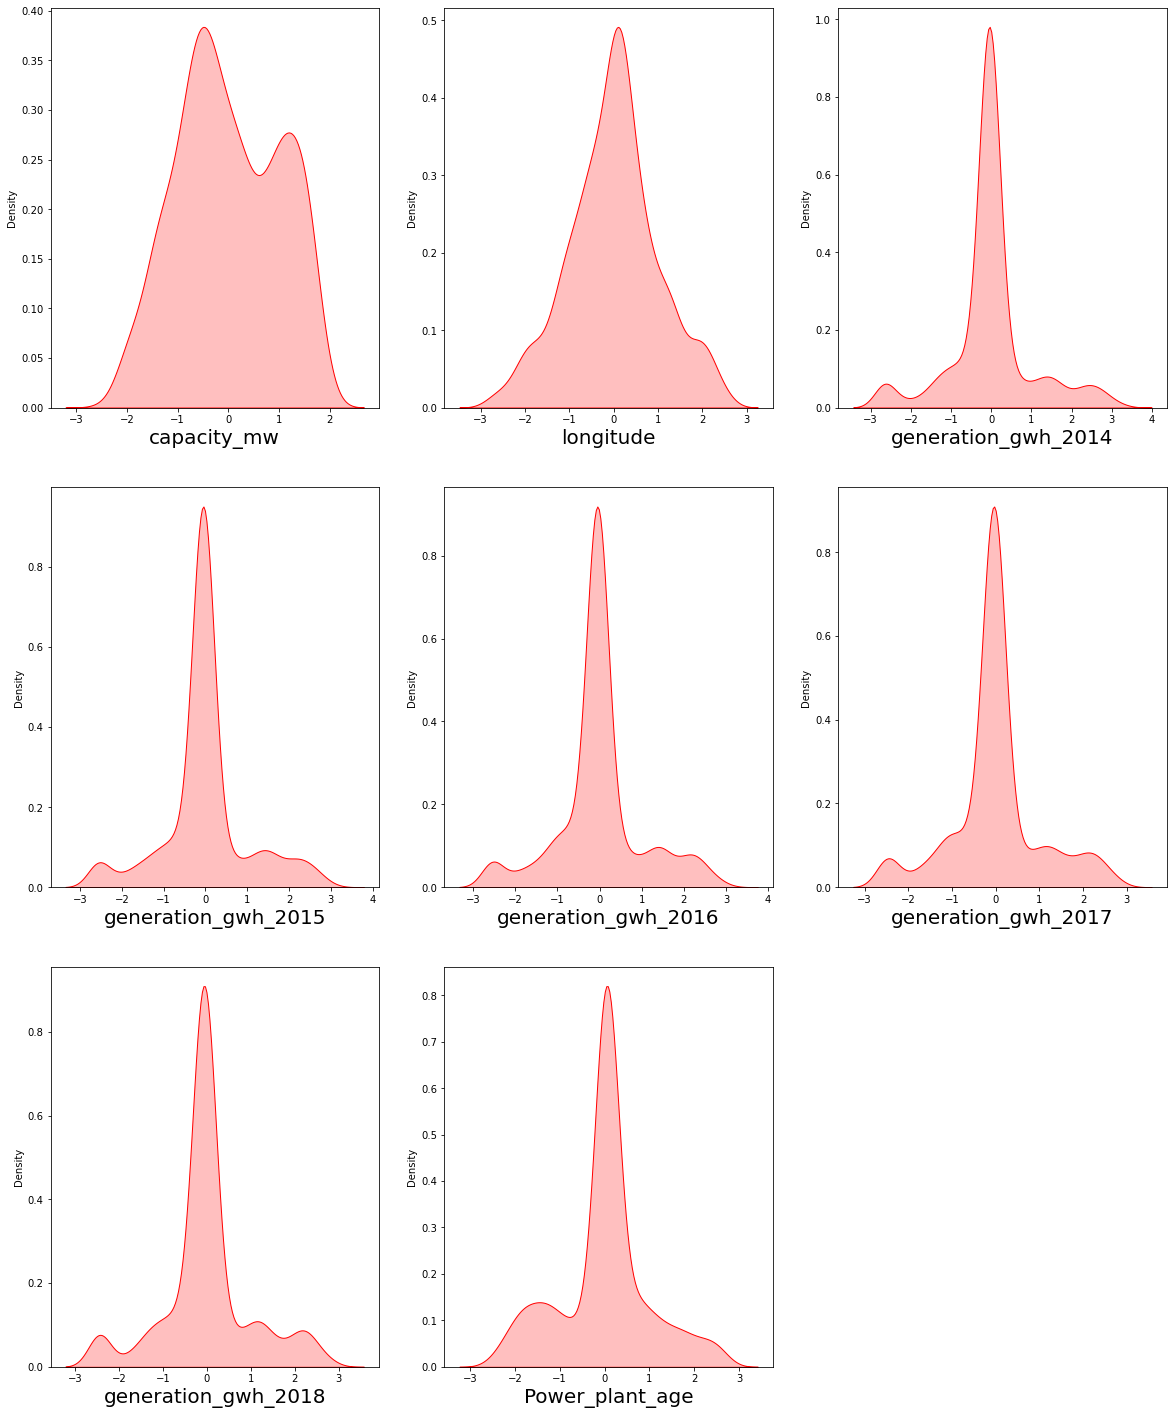

In [110]:
# let's check how the data has been distributed in each column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column],color='r',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

* The data is not normal but we can notice the skewness has been removed.

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_df = pd.DataFrame(scaler.fit_transform(x_df), columns=x_df.columns)
x_df

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.110868
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.249172
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.779328
...,...,...,...,...,...,...,...,...,...,...
846,1.672840,0.231932,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.982411
847,-1.598186,0.421592,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
848,-0.507278,-0.224400,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
849,0.111201,-0.760624,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442


* So here we have scaled the data using Standard Scalarization method to overcome with the issue of data biasness.

* As we have observed in the heat map there is multicolinearity issue exists in the data, so let's check the VIF value and if the columns have VIF > 10 then we can drop those columns.

### Checking VIF values:

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_df.values,i)
              for i in range(len(x_df.columns))]
vif["Features"] = x_df.columns
vif

,VIF values,Features
0,1.814763,capacity_mw
1,1.193803,longitude
2,1.412954,source
3,1.591030,geolocation_source
4,3.625589,generation_gwh_2014
5,6.189896,generation_gwh_2015
6,9.959672,generation_gwh_2016
7,9.765110,generation_gwh_2017
8,8.960648,generation_gwh_2018
9,1.158205,Power_plant_age


* The VIF value is less than 10 in all the columns which means we are free from multicolinearity problem.

In [113]:
y_df.value_counts()

1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

* Here we can observe that the target variable 'primary_fuel' has multi classes means it is a multiclassification problem .
* Also **the data is not balanced so we will use oversampling method to balance the data.**

### Oversampling:

In [114]:
# adding samples to make all the categorical label values same
from imblearn.over_sampling import SMOTE

SM = SMOTE()
x_df, y_df = SM.fit_resample(x_df,y_df)

In [115]:
y_df.value_counts()

7    238
6    238
5    238
4    238
3    238
2    238
1    238
0    238
Name: primary_fuel, dtype: int64

* Since the highest count of the target was 238 so the data is balanced by oversampling all the classes to the count 238

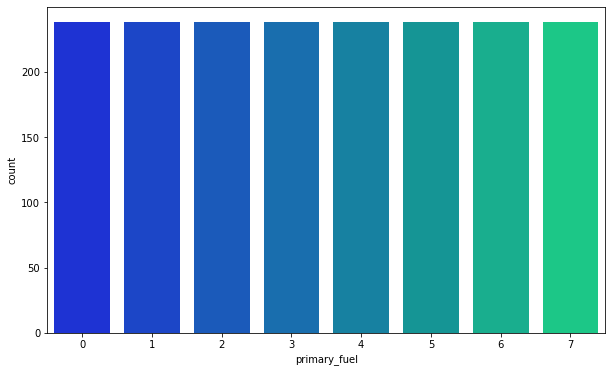

In [116]:
# visualize the data after balancing
plt.figure(figsize=(10,6))
sns.countplot(y_df,palette="winter")
plt.show()

Here we can clearly visualize the dat in all the types are equal.

In [117]:
x_df.head()

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.110868
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.249172
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.779328


* This is the dataframe after preprocessing and cleaning the data.

## Modeling:

* **Finding the best random state:**

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
macRS=0
for i in range(1,350):
    x_df_train,x_df_test,y_df_train,y_df_test = train_test_split(x_df,y_df,test_size=.25,random_state=i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_df_train,y_df_train)
    pred = DTC.predict(x_df_test)
    acc=accuracy_score(y_df_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"% on Random_state ",maxRS)

Best accuracy is  0.9138655462184874 % on Random_state  262


* **Creating train_test_split:**

In [119]:
x_df_train,x_df_test,y_df_train,y_df_test=train_test_split(x_df,y_df,test_size=.25,random_state=maxRS)

* We have created a new train test split using Random State.

## Classification Algorithms:

In [150]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

### 1. Decision Tree Classifier:

In [121]:
# checking accuracy for decision tree classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_df_train,y_df_train)

# prediction
predDTC = DTC.predict(x_df_test)

print(accuracy_score(y_df_test, predDTC))
print(confusion_matrix(y_df_test, predDTC))
print(classification_report(y_df_test, predDTC))

0.9096638655462185
[[65  4  0  0  0  0  0  0]
 [ 6 37  2  4  3  0  0  0]
 [ 0  3 46  3  0  2  0  0]
 [ 0  4  4 54  0  0  0  0]
 [ 0  1  0  1 52  0  0  0]
 [ 1  2  3  0  0 55  0  0]
 [ 0  0  0  0  0  0 68  0]
 [ 0  0  0  0  0  0  0 56]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        69
           1       0.73      0.71      0.72        52
           2       0.84      0.85      0.84        54
           3       0.87      0.87      0.87        62
           4       0.95      0.96      0.95        54
           5       0.96      0.90      0.93        61
           6       1.00      1.00      1.00        68
           7       1.00      1.00      1.00        56

    accuracy                           0.91       476
   macro avg       0.91      0.91      0.91       476
weighted avg       0.91      0.91      0.91       476



* So here we are getting 90% accuracy using DTC.

We can also observe th confusion matrx which contains True-Positive, False-Positive rate and False-Negative, True-Negative rate.

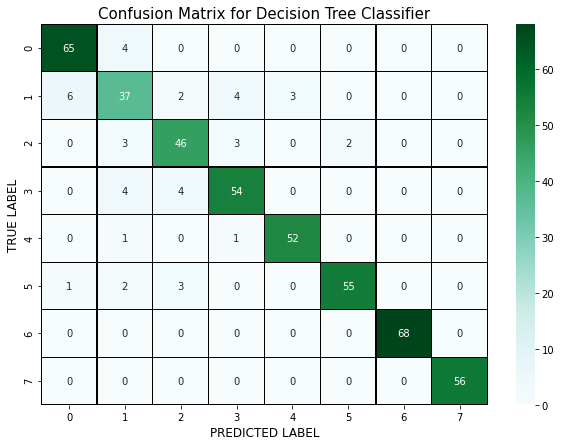

In [122]:
# let's plot confusion matrix for DTC
cm = confusion_matrix(y_df_test,predDTC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL",fontsize = 12)
plt.ylabel("TRUE LABEL",fontsize = 12)
plt.title("Confusion Matrix for Decision Tree Classifier",fontsize = 15)
plt.show()

### 2. Random Forest Classifier:

In [123]:
RFC = RandomForestClassifier()
RFC.fit(x_df_train,y_df_train)

# prediction
predRFC = RFC.predict(x_df_test)

print(accuracy_score(y_df_test, predRFC))
print(confusion_matrix(y_df_test, predRFC))
print(classification_report(y_df_test, predRFC))

0.9369747899159664
[[68  1  0  0  0  0  0  0]
 [ 5 41  0  1  3  2  0  0]
 [ 0  1 51  0  0  2  0  0]
 [ 0  6  3 53  0  0  0  0]
 [ 0  0  1  0 53  0  0  0]
 [ 1  4  0  0  0 56  0  0]
 [ 0  0  0  0  0  0 68  0]
 [ 0  0  0  0  0  0  0 56]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        69
           1       0.77      0.79      0.78        52
           2       0.93      0.94      0.94        54
           3       0.98      0.85      0.91        62
           4       0.95      0.98      0.96        54
           5       0.93      0.92      0.93        61
           6       1.00      1.00      1.00        68
           7       1.00      1.00      1.00        56

    accuracy                           0.94       476
   macro avg       0.94      0.93      0.93       476
weighted avg       0.94      0.94      0.94       476



* The Random Forest Classifier has accuracy 93%.

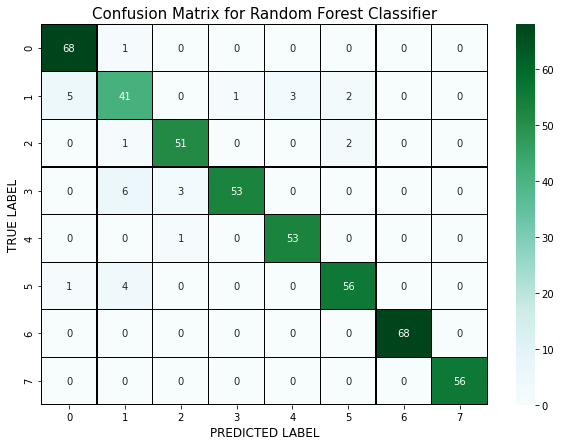

In [124]:
# let's plot confusion matrix for RFC
cm = confusion_matrix(y_df_test,predRFC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL",fontsize = 12)
plt.ylabel("TRUE LABEL",fontsize = 12)
plt.title("Confusion Matrix for Random Forest Classifier",fontsize = 15)
plt.show()

### 3. Support Vector Classifier:

In [125]:
svc = SVC()
svc.fit(x_df_train,y_df_train)

# prediction
predsvc = svc.predict(x_df_test)

print(accuracy_score(y_df_test, predsvc))
print(confusion_matrix(y_df_test, predsvc))
print(classification_report(y_df_test, predsvc))

0.7983193277310925
[[60  0  0  0  0  0  0  9]
 [ 9 25  3  0  6  2  0  7]
 [ 0  4 32  3  2 11  0  2]
 [ 0  7  7 37  2  0  0  9]
 [ 0  0  2  0 52  0  0  0]
 [ 3  3  0  0  0 52  0  3]
 [ 0  1  0  0  0  0 67  0]
 [ 0  0  1  0  0  0  0 55]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        69
           1       0.62      0.48      0.54        52
           2       0.71      0.59      0.65        54
           3       0.93      0.60      0.73        62
           4       0.84      0.96      0.90        54
           5       0.80      0.85      0.83        61
           6       1.00      0.99      0.99        68
           7       0.65      0.98      0.78        56

    accuracy                           0.80       476
   macro avg       0.80      0.79      0.78       476
weighted avg       0.81      0.80      0.79       476



* The accuracy usin SVC is almost 80%.

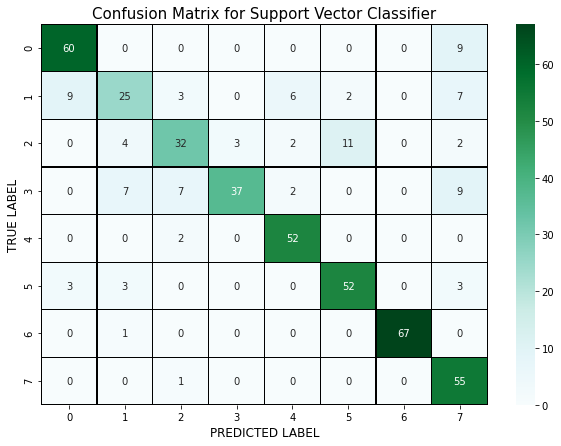

In [126]:
# let's plot confusion matrix for SVC
cm = confusion_matrix(y_df_test,predsvc)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL",fontsize = 12)
plt.ylabel("TRUE LABEL",fontsize = 12)
plt.title("Confusion Matrix for Support Vector Classifier",fontsize = 15)
plt.show()

### 4. KNeighbors Classifier:

In [127]:
knn = KNN()
knn.fit(x_df_train,y_df_train)

# prediction
predknn = knn.predict(x_df_test)

print(accuracy_score(y_df_test, predknn))
print(confusion_matrix(y_df_test, predknn))
print(classification_report(y_df_test, predknn))

0.8529411764705882
[[69  0  0  0  0  0  0  0]
 [ 7 26  4  3  5  1  0  6]
 [ 0  3 41  0  0  6  0  4]
 [ 0  6  9 43  0  0  0  4]
 [ 0  0  5  0 49  0  0  0]
 [ 5  1  0  0  0 54  0  1]
 [ 0  0  0  0  0  0 68  0]
 [ 0  0  0  0  0  0  0 56]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        69
           1       0.72      0.50      0.59        52
           2       0.69      0.76      0.73        54
           3       0.93      0.69      0.80        62
           4       0.91      0.91      0.91        54
           5       0.89      0.89      0.89        61
           6       1.00      1.00      1.00        68
           7       0.79      1.00      0.88        56

    accuracy                           0.85       476
   macro avg       0.85      0.84      0.84       476
weighted avg       0.86      0.85      0.85       476



* The accuracy using KNN is 85%

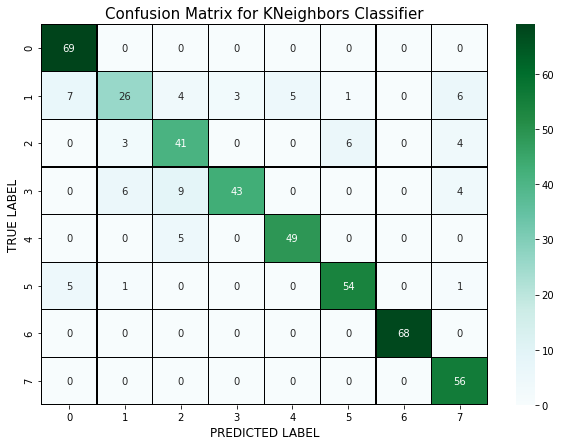

In [128]:
# let's plot confusion matrix for KNN
cm = confusion_matrix(y_df_test,predknn)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL",fontsize = 12)
plt.ylabel("TRUE LABEL",fontsize = 12)
plt.title("Confusion Matrix for KNeighbors Classifier",fontsize = 15)
plt.show()

### 5. Gradient Boosting Classifier:

In [129]:
GB = GradientBoostingClassifier()
GB.fit(x_df_train,y_df_train)

# prediction
predGB = GB.predict(x_df_test)

print(accuracy_score(y_df_test, predGB))
print(confusion_matrix(y_df_test, predGB))
print(classification_report(y_df_test, predGB))

0.9243697478991597
[[68  1  0  0  0  0  0  0]
 [ 8 39  1  1  3  0  0  0]
 [ 0  1 48  1  1  3  0  0]
 [ 0  4  4 54  0  0  0  0]
 [ 0  0  2  0 52  0  0  0]
 [ 1  4  0  0  0 56  0  0]
 [ 0  1  0  0  0  0 67  0]
 [ 0  0  0  0  0  0  0 56]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93        69
           1       0.78      0.75      0.76        52
           2       0.87      0.89      0.88        54
           3       0.96      0.87      0.92        62
           4       0.93      0.96      0.95        54
           5       0.95      0.92      0.93        61
           6       1.00      0.99      0.99        68
           7       1.00      1.00      1.00        56

    accuracy                           0.92       476
   macro avg       0.92      0.92      0.92       476
weighted avg       0.93      0.92      0.92       476



* So the accuracy using Gb is 92.4%.

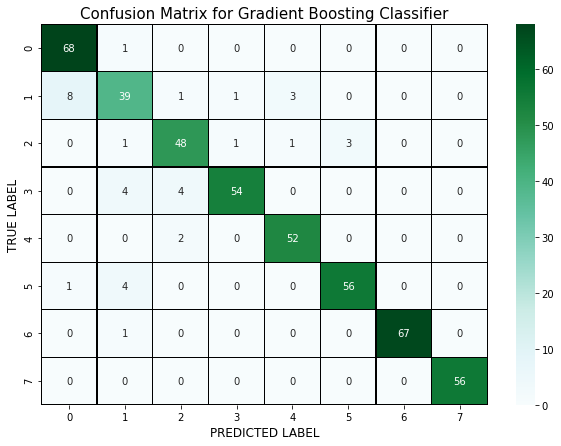

In [130]:
# let's plot confusion matrix for GB
cm = confusion_matrix(y_df_test,predGB)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL",fontsize = 12)
plt.ylabel("TRUE LABEL",fontsize = 12)
plt.title("Confusion Matrix for Gradient Boosting Classifier",fontsize = 15)
plt.show()

### 6. Bagging Classifier:

In [131]:
BC = BaggingClassifier()
BC.fit(x_df_train,y_df_train)

# prediction
predBC = BC.predict(x_df_test)

print(accuracy_score(y_df_test, predBC))
print(confusion_matrix(y_df_test, predBC))
print(classification_report(y_df_test, predBC))

0.9201680672268907
[[68  1  0  0  0  0  0  0]
 [ 4 39  1  3  4  1  0  0]
 [ 0  3 49  0  0  2  0  0]
 [ 0  6  6 50  0  0  0  0]
 [ 0  0  0  1 53  0  0  0]
 [ 1  4  1  0  0 55  0  0]
 [ 0  0  0  0  0  0 68  0]
 [ 0  0  0  0  0  0  0 56]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        69
           1       0.74      0.75      0.74        52
           2       0.86      0.91      0.88        54
           3       0.93      0.81      0.86        62
           4       0.93      0.98      0.95        54
           5       0.95      0.90      0.92        61
           6       1.00      1.00      1.00        68
           7       1.00      1.00      1.00        56

    accuracy                           0.92       476
   macro avg       0.92      0.92      0.92       476
weighted avg       0.92      0.92      0.92       476



* So the accuracy using BC is 92%.

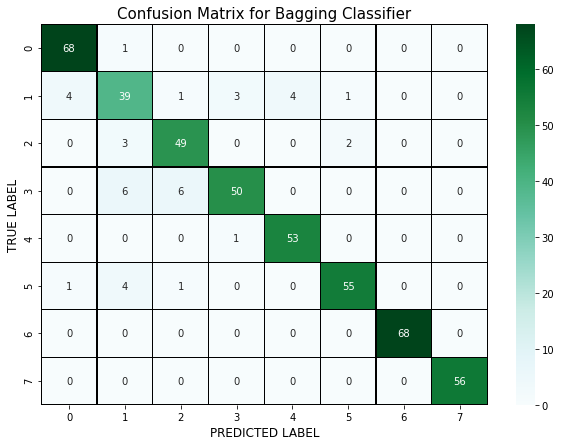

In [132]:
# let's plot confusion matrix for BC
cm = confusion_matrix(y_df_test,predBC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL",fontsize = 12)
plt.ylabel("TRUE LABEL",fontsize = 12)
plt.title("Confusion Matrix for Bagging Classifier",fontsize = 15)
plt.show()

## Checking the Cross Validation Score:

In [133]:
from sklearn.model_selection import cross_val_score

In [134]:
# cv scor for Decision Tree Classifier
print(cross_val_score(DTC ,x_df,y_df,cv=5).mean())

0.8655532532117697


In [135]:
# cv scor for Random Forest Classifier
print(cross_val_score(RFC ,x_df,y_df,cv=5).mean())

0.9122972786296449


In [136]:
# cv scor for Support Vector Classifier
print(cross_val_score(svc,x_df,y_df,cv=5).mean())

0.7914877745544964


In [137]:
# cv scor for KNeighbors Classifier
print(cross_val_score(knn ,x_df,y_df,cv=5).mean())

0.8539908827186075


In [138]:
# cv scor for Gradient Boosting Classifier
print(cross_val_score(GB ,x_df,y_df,cv=5).mean())

0.9017930653405166


In [139]:
# cv scor for Bagging Classifier
print(cross_val_score(BC ,x_df,y_df,cv=5).mean())

0.8965451029147673


Above are the cross validation score for all the models used:

* The difference between accuracy score and cross validation score of Gradient Boosting Classifier is very less compared to other models .

* So we can conclude that **Gradient Boosting Classifier as our best fitting model.**

## Hyper Parameter Tuning:

In [140]:
# Gradient Boosting Classifier
parameters ={'criterion':['friedman_mse','mse','mae'],
            'max_features':['auto','sqrt','log2'],
            'n_estimators':[0,200],
            'max_depth':[2,3,4,5,6,8]}

In [141]:
GCV = GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [142]:
GCV.fit(x_df_train,y_df_train) 

C:\Users\Abhimanyu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
270 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Abhimanyu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Abhimanyu\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 525, in fit
    self._check_params()
  File "C:\Users\Abhimanyu\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 269, in _check_params
    raise ValueError(
ValueError: n_estimators must be greater than 

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [143]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 200}

* These are the best parameter values.

In [146]:
fuel_type =GradientBoostingClassifier (criterion='mse', max_depth=5, max_features='sqrt', n_estimators=200)
fuel_type.fit(x_df_train,y_df_train)
pred = fuel_type.predict(x_df_test)
acc=accuracy_score(y_df_test,pred)
print(acc*100)

93.90756302521008


* So here we can see the accuracy of the best model is increased after tuning which is good.

### ROC and AUC for the final model:

In [162]:
from sklearn.metrics import roc_curve, auc

y_df_prob = fuel_type.fit(x_df_train,y_df_train).predict_proba(x_df_test)

macro_roc_auc_ovo = roc_auc_score(y_df_test, y_df_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_df_test, y_df_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_df_test, y_df_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_df_test, y_df_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.995091 (macro),
0.995287 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.995234 (macro),
0.995536 (weighted by prevalence)


In [165]:
### Saving the Model:

In [164]:
import joblib
joblib.dump(fuel_type,"Global_Power_Plant_(IND)_primary_fuel.pkl")


['Global_Power_Plant_(IND)_primary_fuel.pkl']

* We have saved the final model using joblib.

## Conclusion :-

- The final R2 score for the prediction of capacity_mw of the power plant using Regression algorithm is = 88%
- The final Accuracy  for the prediction of Fuel_Type of the power plant using Classification algorithm is = 93%